#📌 Extracción

In [191]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [192]:
datos_telecom_x = requests.get('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json')
resultado = json.loads(datos_telecom_x.text)

In [193]:
df = pd.json_normalize(resultado)

In [194]:
df.sample(10)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
4524,6199-IWKGC,No,Female,1,Yes,No,46,Yes,Yes,Fiber optic,...,No,No,Yes,Yes,Yes,One year,No,Electronic check,100.25,4753.85
1523,2189-WWOEW,Yes,Female,0,No,Yes,15,Yes,No,Fiber optic,...,Yes,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),85.90,1269.55
2856,3961-SXAXY,No,Male,0,No,No,1,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.05,44.05
1405,2027-FECZV,Yes,Male,0,No,No,12,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.70,1253.9
1682,2382-BCKQJ,Yes,Female,0,No,Yes,62,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,One year,Yes,Electronic check,100.15,6413.65
577,0824-VWDPO,No,Female,0,No,No,45,Yes,Yes,Fiber optic,...,Yes,No,No,No,Yes,One year,No,Bank transfer (automatic),96.75,4442.75
3622,4992-LTJNE,No,Male,0,Yes,Yes,72,Yes,Yes,DSL,...,No,No,No,No,No,Two year,No,Bank transfer (automatic),55.30,3983.6
1439,2070-XYMFH,No,Female,1,No,No,23,Yes,Yes,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Mailed check,79.35,1835.3
3486,4818-QIUFN,Yes,Female,1,No,No,20,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,79.15,1520.9
6602,9076-AXYIK,No,Male,1,Yes,No,64,Yes,Yes,Fiber optic,...,No,Yes,Yes,Yes,Yes,Two year,No,Electronic check,102.10,6538.45


#🔧 Transformación

In [195]:
df.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [197]:
df['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [198]:
df['customer.gender'].unique()

array(['Female', 'Male'], dtype=object)

In [199]:
df['customer.SeniorCitizen'].unique()

array([0, 1])

In [200]:
df['customer.Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [201]:
df['customer.Dependents'].unique()

array(['Yes', 'No'], dtype=object)

In [202]:
df['customer.tenure'].unique()

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
       35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
       17, 18, 38, 42,  0])

In [203]:
df['phone.PhoneService'].unique()

array(['Yes', 'No'], dtype=object)

In [204]:
df['phone.MultipleLines'].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [205]:
df['internet.InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [206]:
df['internet.OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [207]:
df['internet.OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [208]:
df['internet.DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [209]:
df['internet.TechSupport'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [210]:
df['internet.StreamingTV'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [211]:
df['internet.StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [212]:
df['account.Contract'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [213]:
df['account.PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [214]:
df['account.PaymentMethod'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [215]:
df['account.Charges.Monthly'].unique()

array([65.6 , 59.9 , 73.9 , ..., 91.75, 68.8 , 67.85])

In [216]:
df['account.Charges.Total'].unique()

array(['593.3', '542.4', '280.85', ..., '742.9', '4627.65', '3707.6'],
      dtype=object)

In [217]:
df.sample(10)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
2586,3605-JISKB,No,Male,1,Yes,No,55,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.1
4769,6532-YOHZY,,Male,0,Yes,Yes,45,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.75,4900.65
3108,4325-NFSKC,Yes,Male,1,No,No,19,Yes,Yes,Fiber optic,...,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.60,1660
1394,2014-MKGMH,No,Female,0,No,No,46,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,One year,Yes,Electronic check,101.10,4674.4
3495,4825-FUREZ,No,Male,0,Yes,No,42,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Electronic check,20.25,835.5
786,1112-CUNAO,Yes,Female,1,No,No,15,Yes,Yes,Fiber optic,...,Yes,No,No,No,Yes,Month-to-month,No,Electronic check,89.85,1424.95
1361,1965-DDBWU,Yes,Male,0,No,No,16,Yes,Yes,Fiber optic,...,No,No,Yes,No,Yes,Month-to-month,Yes,Credit card (automatic),89.05,1448.6
3982,5445-PZWGX,Yes,Male,0,No,No,62,Yes,Yes,Fiber optic,...,Yes,No,Yes,No,Yes,One year,No,Electronic check,102.00,6529.25
6228,8565-WUXZU,No,Male,1,Yes,No,72,Yes,No,Fiber optic,...,Yes,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.80,6141.65
6011,8212-CRQXP,No,Female,0,Yes,No,22,Yes,No,Fiber optic,...,No,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),80.00,1706.45


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [219]:
# Conversión de la columna account.Charges.Total a tipo float64

df['account.Charges.Total'] = df['account.Charges.Total'].apply(lambda x: x.replace('$','').replace(',','').strip())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [220]:
df.sample(10)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
6364,8748-HFWBO,No,Male,0,Yes,Yes,19,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.90,357.7
1051,1470-PSXNM,No,Male,0,Yes,Yes,49,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,No,One year,Yes,Electronic check,93.65,4520.15
7067,9732-KPKBW,Yes,Male,0,No,No,1,Yes,No,DSL,...,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,53.95,53.95
620,0880-TKATG,Yes,Male,0,Yes,Yes,4,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,101.15,385.9
804,1136-XGEQU,No,Female,0,Yes,Yes,50,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),84.15,4164.4
6606,9081-WWXKP,No,Female,0,Yes,Yes,47,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.25,873.4
2286,3190-FZATL,No,Male,0,No,Yes,14,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.95,268.4
6597,9068-VPWQQ,No,Male,0,Yes,No,61,Yes,Yes,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),75.35,4729.3
1619,2300-RQGOI,No,Female,0,No,No,38,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.05,741.5
1916,2710-WYVXG,No,Female,0,No,No,3,Yes,No,DSL,...,Yes,No,Yes,No,Yes,Two year,No,Mailed check,71.10,213.35


In [221]:
df['account.Charges.Total'] = df['account.Charges.Total'].replace('', np.nan).astype(np.float64)

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [223]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [224]:
df = df.fillna(0.0)

In [225]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

## Columnas importantes para el análisis solicitado

--- ---

- Churn
- Senior Citizen
- Dependents
- Tenure
- Phone Service
- Multiple Lines
- Internet Service
- Tech Support
- Contract
- Charges Monthly
- Charges Total

In [227]:
df['Churn'] = df['Churn'].map({'Yes': True, 'No': False, '': False})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   bool   
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [228]:
# Estandarización de datos

df['customer.SeniorCitizen'] = df['customer.SeniorCitizen'].map({0: False, 1: True})

for col in ['customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'account.PaperlessBilling']:
    df[col] = df[col].map({'Yes': True, 'No': False})

df['phone.MultipleLines'] = df['phone.MultipleLines'].map({'Yes': True, 'No': False, 'No phone service': False})

for col in ['internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies']:
    df[col] = df[col].map({'Yes': True, 'No': False, 'No internet service': False})

In [229]:
df['customer.SeniorCitizen']

,customer.SeniorCitizen
0,False
1,False
2,False
3,True
4,True
...,...
7262,False
7263,False
7264,False
7265,False


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   bool   
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   bool   
 4   customer.Partner           7267 non-null   bool   
 5   customer.Dependents        7267 non-null   bool   
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   bool   
 8   phone.MultipleLines        7267 non-null   bool   
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   bool   
 11  internet.OnlineBackup      7267 non-null   bool   
 12  internet.DeviceProtection  7267 non-null   bool   
 13  internet.TechSupport       7267 non-null   bool 

In [231]:
df_dupl = df[df.duplicated()]
df_dupl

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   bool   
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   bool   
 4   customer.Partner           7267 non-null   bool   
 5   customer.Dependents        7267 non-null   bool   
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   bool   
 8   phone.MultipleLines        7267 non-null   bool   
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   bool   
 11  internet.OnlineBackup      7267 non-null   bool   
 12  internet.DeviceProtection  7267 non-null   bool   
 13  internet.TechSupport       7267 non-null   bool 

In [233]:
for col in ['customer.gender', 'internet.InternetService', 'account.Contract', 'account.PaymentMethod']:
  df[col] = df[col].str.lower()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   bool   
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   bool   
 4   customer.Partner           7267 non-null   bool   
 5   customer.Dependents        7267 non-null   bool   
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   bool   
 8   phone.MultipleLines        7267 non-null   bool   
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   bool   
 11  internet.OnlineBackup      7267 non-null   bool   
 12  internet.DeviceProtection  7267 non-null   bool   
 13  internet.TechSupport       7267 non-null   bool 

In [234]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,False,female,False,True,True,9,True,False,dsl,...,True,False,True,True,False,one year,True,mailed check,65.6,593.30
1,0003-MKNFE,False,male,False,False,False,9,True,True,dsl,...,False,False,False,False,True,month-to-month,False,mailed check,59.9,542.40
2,0004-TLHLJ,True,male,False,False,False,4,True,False,fiber optic,...,False,True,False,False,False,month-to-month,True,electronic check,73.9,280.85
3,0011-IGKFF,True,male,True,True,False,13,True,False,fiber optic,...,True,True,False,True,True,month-to-month,True,electronic check,98.0,1237.85
4,0013-EXCHZ,True,female,True,True,False,3,True,False,fiber optic,...,False,False,True,True,False,month-to-month,True,mailed check,83.9,267.40


In [235]:
df['Cuenta diaria'] = df['account.Charges.Monthly'] / 30
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuenta diaria
0,0002-ORFBO,False,female,False,True,True,9,True,False,dsl,...,False,True,True,False,one year,True,mailed check,65.6,593.30,2.186667
1,0003-MKNFE,False,male,False,False,False,9,True,True,dsl,...,False,False,False,True,month-to-month,False,mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,True,male,False,False,False,4,True,False,fiber optic,...,True,False,False,False,month-to-month,True,electronic check,73.9,280.85,2.463333
3,0011-IGKFF,True,male,True,True,False,13,True,False,fiber optic,...,True,False,True,True,month-to-month,True,electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,True,female,True,True,False,3,True,False,fiber optic,...,False,True,True,False,month-to-month,True,mailed check,83.9,267.40,2.796667


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   bool   
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   bool   
 4   customer.Partner           7267 non-null   bool   
 5   customer.Dependents        7267 non-null   bool   
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   bool   
 8   phone.MultipleLines        7267 non-null   bool   
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   bool   
 11  internet.OnlineBackup      7267 non-null   bool   
 12  internet.DeviceProtection  7267 non-null   bool   
 13  internet.TechSupport       7267 non-null   bool 

In [237]:
df = df.rename(columns={'customer.gender': 'Genero', 'customer.SeniorCitizen': 'Mayor a 65 Años', 'customer.Partner': 'Casad@',
                        'customer.Dependents': 'Dependientes', 'customer.tenure': 'Tiempo de cliente', 'phone.PhoneService': 'Servicio de telefonia',
                        'phone.MultipleLines': 'Multiples lineas', 'internet.InternetService': 'Servicio de Internet', 'internet.OnlineSecurity': 'Seguridad en linea',
                        'internet.OnlineBackup': 'Respaldo en linea', 'internet.DeviceProtection': 'Proteccion del dispositivo', 'internet.TechSupport': 'Soporte Premium',
                        'internet.StreamingTV': 'Suscripción por cable', 'internet.StreamingMovies': 'Streaming Peliculas', 'account.Contract': 'Tipo de contrato',
                        'account.PaperlessBilling': 'Facturacion en linea', 'account.PaymentMethod': 'Forma de pago', 'account.Charges.Monthly': 'Cuenta mensual',
                        'account.Charges.Total': 'Cuenta total'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerID                  7267 non-null   object 
 1   Churn                       7267 non-null   bool   
 2   Genero                      7267 non-null   object 
 3   Mayor a 65 Años             7267 non-null   bool   
 4   Casad@                      7267 non-null   bool   
 5   Dependientes                7267 non-null   bool   
 6   Tiempo de cliente           7267 non-null   int64  
 7   Servicio de telefonia       7267 non-null   bool   
 8   Multiples lineas            7267 non-null   bool   
 9   Servicio de Internet        7267 non-null   object 
 10  Seguridad en linea          7267 non-null   bool   
 11  Respaldo en linea           7267 non-null   bool   
 12  Proteccion del dispositivo  7267 non-null   bool   
 13  Soporte Premium             7267 

#📊 Carga y análisis

In [238]:
df.describe()

,Tiempo de cliente,Cuenta mensual,Cuenta total,Cuenta diaria
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,2277.182035,2.157337
std,24.571773,30.129572,2268.648587,1.004319
min,0.000000,18.250000,0.000000,0.608333
25%,9.000000,35.425000,396.200000,1.180833
50%,29.000000,70.300000,1389.200000,2.343333
75%,55.000000,89.875000,3778.525000,2.995833
max,72.000000,118.750000,8684.800000,3.958333


In [239]:
df['Churn'].sum()

np.int64(1869)

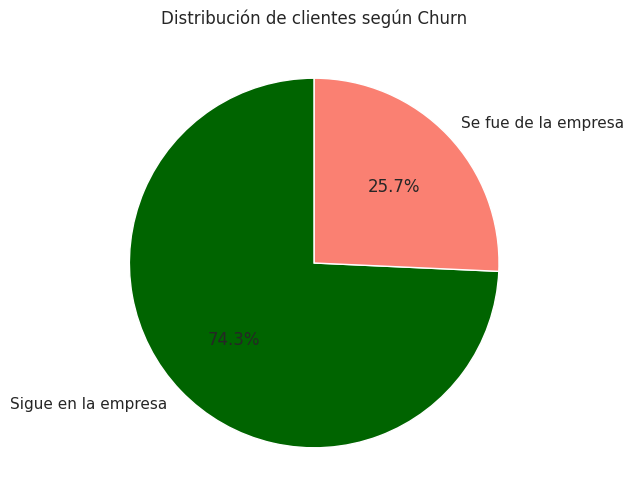

In [240]:
conteo_churn = df['Churn'].value_counts()

# Gráfico de pastel
plt.figure(figsize=(6,6))
plt.pie(conteo_churn, labels=['Sigue en la empresa', 'Se fue de la empresa'], autopct='%1.1f%%', startangle=90, colors=['darkgreen', 'salmon'])
plt.title('Distribución de clientes según Churn')
plt.show()

In [241]:
from matplotlib.patches import Patch

# Agrupar por columnas

def agrupar_graficar(columna):

  sns.set_theme(style='white')
  churn_cat = df.groupby([columna, 'Churn']).size().reset_index(name='Conteo')

  churn_cat['Porcentaje'] = churn_cat.groupby(columna)['Conteo'].transform(lambda x: x / x.sum() * 100)

  colores = {False: '#003366', True: '#CCCCCC'}

  fig, ax = plt.subplots(figsize=(8,6))
  ax = sns.barplot(data=churn_cat, x=columna, y='Porcentaje', hue='Churn', palette=colores)

  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

  for container, bar_data in zip(ax.containers, [group for _, group in churn_cat.groupby('Churn')]):
    labels = [f"{p:.1f}%\n(n={int(n)})" for p, n in zip(bar_data['Porcentaje'], bar_data['Conteo'])]
    ax.bar_label(container, labels=labels, padding=3)

  ax.set_yticks([])
  ax.set_ylabel('')

  plt.title(f'Porcentaje de Churn por {columna}')
  plt.ylabel('Porcentaje (%)')
  plt.xlabel(columna)
  plt.xticks(rotation=15)
  plt.ylim(0,110)

  leyenda_personalizada = [
    Patch(facecolor=colores[False], label='Sigue en la empresa'),
    Patch(facecolor=colores[True], label='Se fue')
  ]

  ax.legend(handles=leyenda_personalizada, title='Churn', loc='upper left', frameon=True, bbox_to_anchor=(1.02,0.5), borderaxespad=0)

  fig.savefig(f'/content/{columna}',
            transparent=False,dpi=300,bbox_inches='tight')

  plt.tight_layout()
  plt.show()

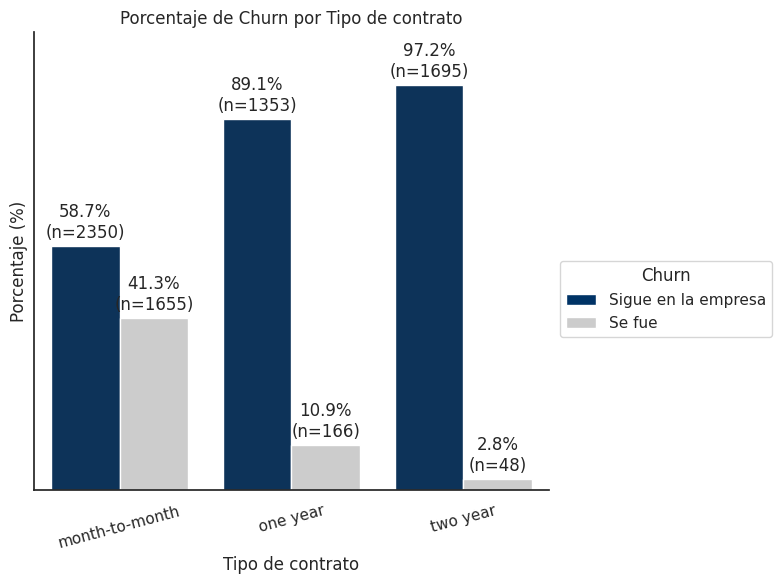

In [242]:
agrupar_graficar('Tipo de contrato')

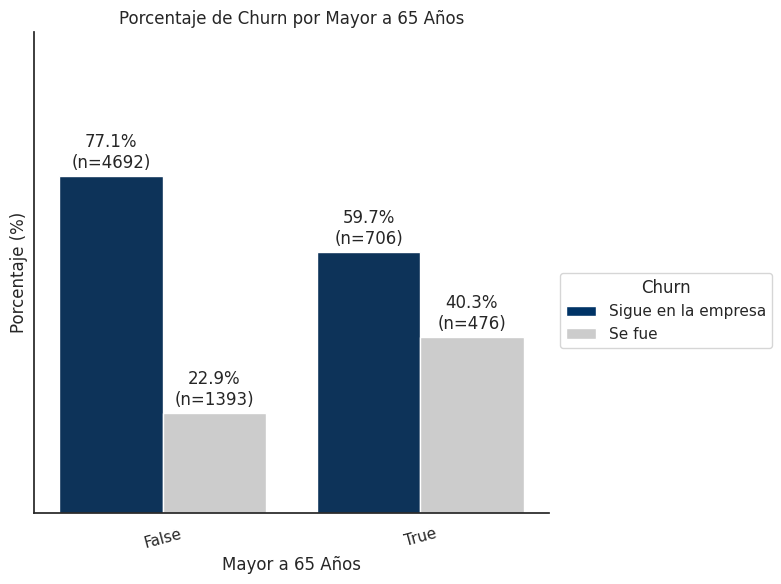

In [243]:
agrupar_graficar('Mayor a 65 Años')

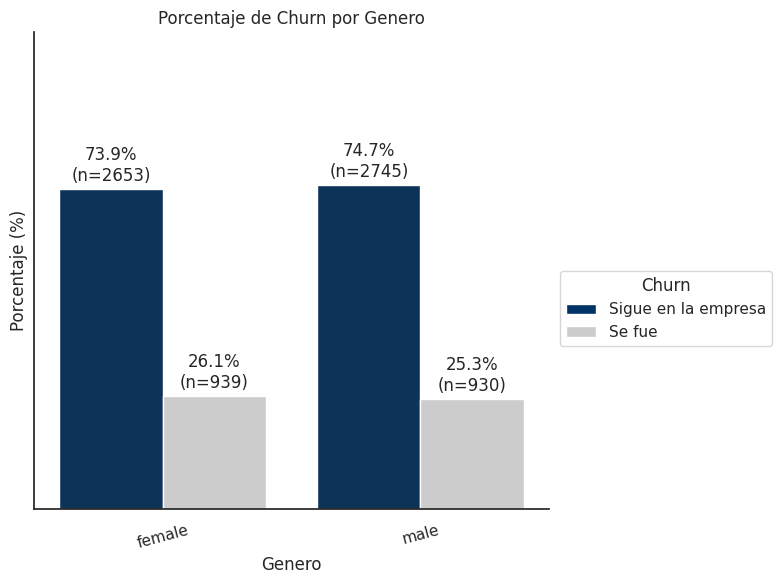

In [244]:
agrupar_graficar('Genero')

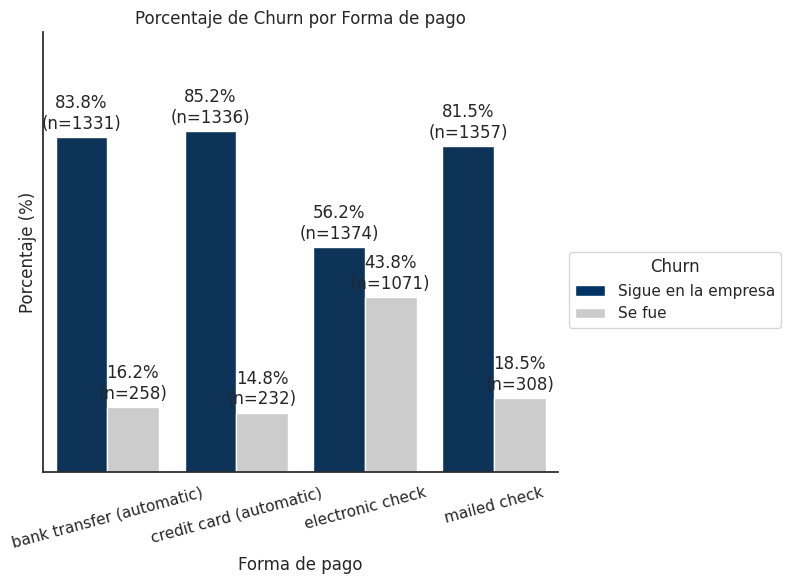

In [245]:
agrupar_graficar('Forma de pago')

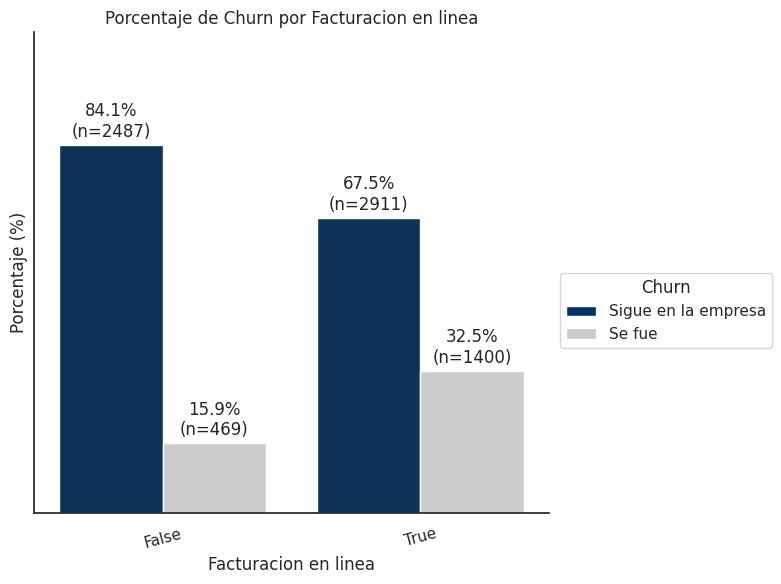

In [246]:
agrupar_graficar('Facturacion en linea')

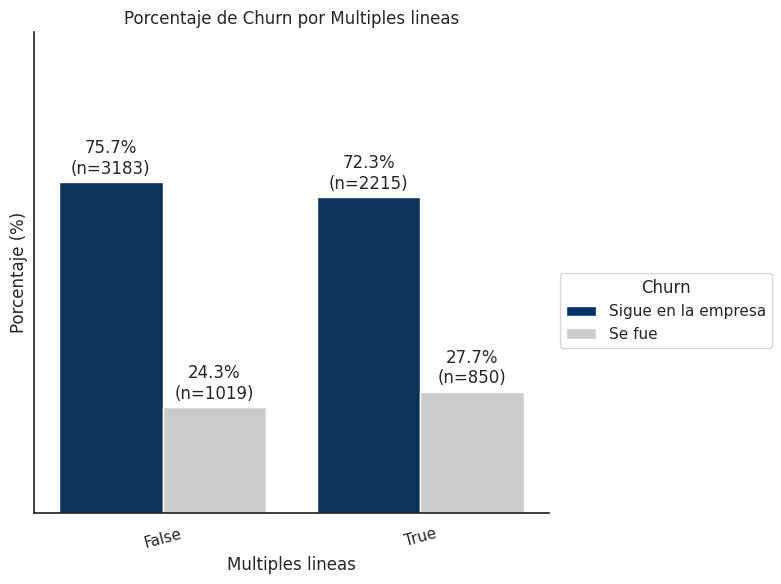

In [247]:
agrupar_graficar('Multiples lineas')

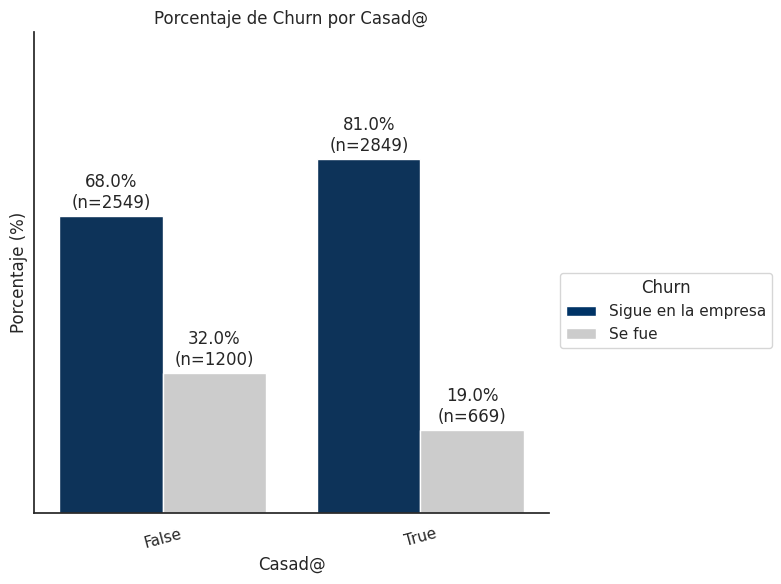

In [248]:
agrupar_graficar('Casad@')

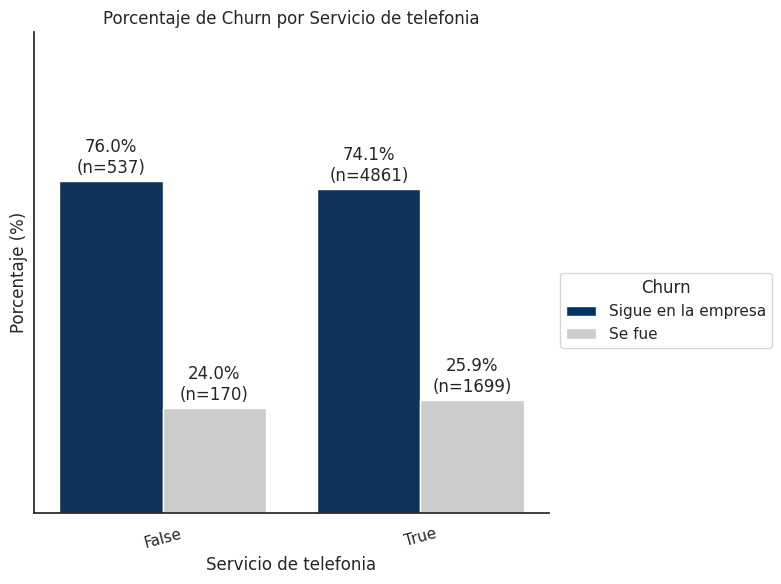

In [249]:
agrupar_graficar('Servicio de telefonia')

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerID                  7267 non-null   object 
 1   Churn                       7267 non-null   bool   
 2   Genero                      7267 non-null   object 
 3   Mayor a 65 Años             7267 non-null   bool   
 4   Casad@                      7267 non-null   bool   
 5   Dependientes                7267 non-null   bool   
 6   Tiempo de cliente           7267 non-null   int64  
 7   Servicio de telefonia       7267 non-null   bool   
 8   Multiples lineas            7267 non-null   bool   
 9   Servicio de Internet        7267 non-null   object 
 10  Seguridad en linea          7267 non-null   bool   
 11  Respaldo en linea           7267 non-null   bool   
 12  Proteccion del dispositivo  7267 non-null   bool   
 13  Soporte Premium             7267 

In [251]:
variables_numericas = ['Tiempo de cliente', 'Cuenta mensual', 'Cuenta total', 'Cuenta diaria']

In [252]:
def grafica_numerica (num):
  fig, ax = plt.subplots(figsize=(8,5))

  ax = sns.kdeplot(data=df, x=num, hue='Churn', fill=True, common_norm=False, palette={False: '#004080', True: '#B0BEC5'})
  plt.title(f'Distribución de {num} según Churn')
  plt.xlabel(num)
  plt.ylabel('Densidad')
  fig.savefig(f'/content/{num}', transparent=False, dpi=300,bbox_inches='tight')

  plt.tight_layout()
  plt.show()

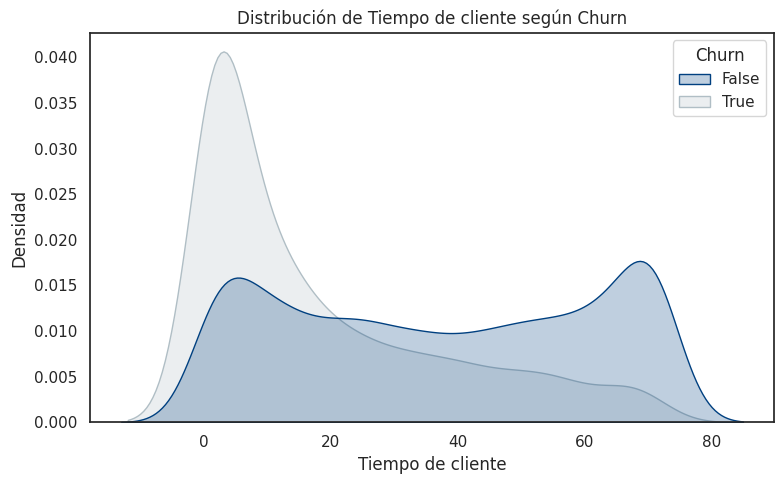

In [253]:
grafica_numerica('Tiempo de cliente')

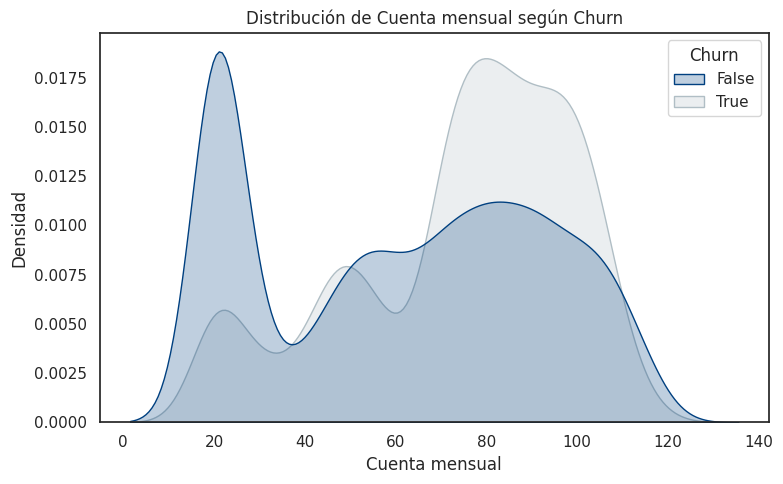

In [254]:
grafica_numerica('Cuenta mensual')

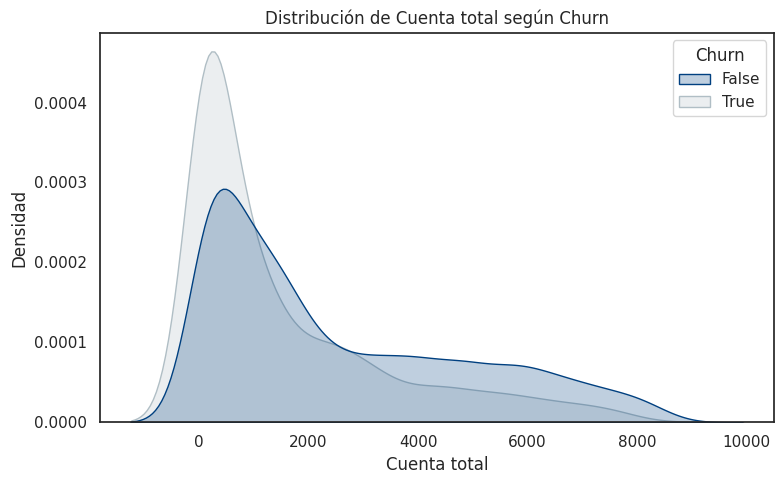

In [255]:
grafica_numerica('Cuenta total')

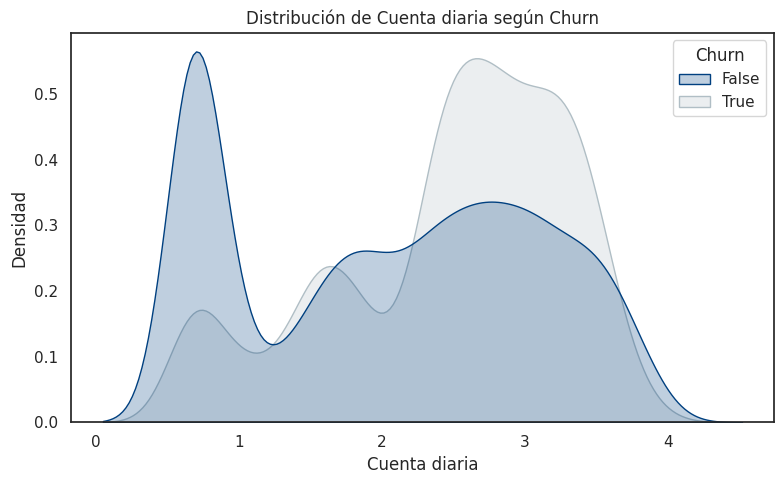

In [256]:
grafica_numerica('Cuenta diaria')

#📄Informe final

## Introducción


El presente informe está pensado para realizar el análisis de evasión de los clientes de una empresa de telecomunicaciones, la cual tiene problemas con evasión con ciertos clientes y están solicitando nuestros servicio para análizar cuales son los clientes que más propensos son a dejar la empresa, por lo tanto nos compartieron los datos para realizar todo lo necesario para entender los patrones de los clientes.

## ETL

### Limpieza y tratamiento de datos

Lo primero que se realizó fue una exploración general de los datos y de como estaban estructurados, por lo tanto se utilizó como medida exploratoria el metodo

```
df['Nombre de Columna'].unique()
```
Este metodo sirve para explorar los valores únicos que se encuentran en cada columna del DataFrame, de esta manera ser permite identificar las primeras inconsistencias para hacer la limpieza de los datos.


También se utilizó el metodo info(), para identificar como está interpretando el software cada una de las columnas

```
df.info()
```
A partir de esta información y la entregada por el método unique() se utilizó una estrategia de manejo de datos númericos incosistentes y luego su respectiva conversión de tipo de datos, para poder realizar el posterior análisis.

```
df['Columna numerica'] = df['Columna numerica'].apply(lambda x: x.replace('$','').replace(',','').strip())
df['Columna numerica'] = df['Columna numerica'].replace('', np.nan).astype(np.float64)
```




Luego utilizando la estrategia de contar la cantidad de datos nulos que hay por cada columna se puede continuar con la limpieza de los datos numericos

```
df.isnull().sum()
```
Este fragmento de código entrega un pandas Series que hace el conteo de la cantidad de datos nulos que hay por cada columna, de esta manera se puede identificar que valores nulos se encuentran y como se puede hacer el manejo


En este paso, se encontró que la columna que indica los valores de cuenta total de los clientes, era la unica columna numerica que contaba con valores nulos, por lo tanto para poder realizar el analisis posterior, se utilizó el metodo fillna()

```
df = df.fillna(0.0)
```
De esta manera siempre se manejan datos numericos, y de esa manera se puede gráficar lo necesario a futuro


Ahora se inició con la limpieza de las columnas categoricas, de esta manera convertir las columnas importantes al tipo booleano, mediante el siguiente fragmento de codigo

```
df['Columna categorica'] = df['Columna categorica'].map({'Yes': True, 'No': False, '': False})
```
Esta manera generica se utilizó para las variables categoricas, ya que permite hacer el conteo mediante metodos booleanos, y facilita el uso de las columnas categoricas para hacer la comparación con respecto a la evasión, además de optimizar el uso de memoria del DataFrame, ya que convierte los datos de tipo 'object' a tipo 'bool'.


Por último se renombraron las columnas, para facilitar el entendimiento del proyecto a personas sin conocimiento técnico de datos o de programación, mediante el uso del metodo rename()

```
df = df.rename({'nombre_actual': 'nombre_nuevo'})
```

Así se garantiza un facil seguimiento de las columnas, tanto para el personal no técnico, como para el personal técnico que vaya a continuar con el proyecto a futuro.

## Análisis exploratorio de Datos

### Variables Categoricas

Ahora se realiza un análisis exploratorio de los datos, para ayudar a entender el comportamiento de los clientes de manera superficial, mientras el equipo de análisis de datos hace un análisis más exhaustivo de los datos. En el presente informe se realizaron inicialemnte los análisis de las variables categoricas.

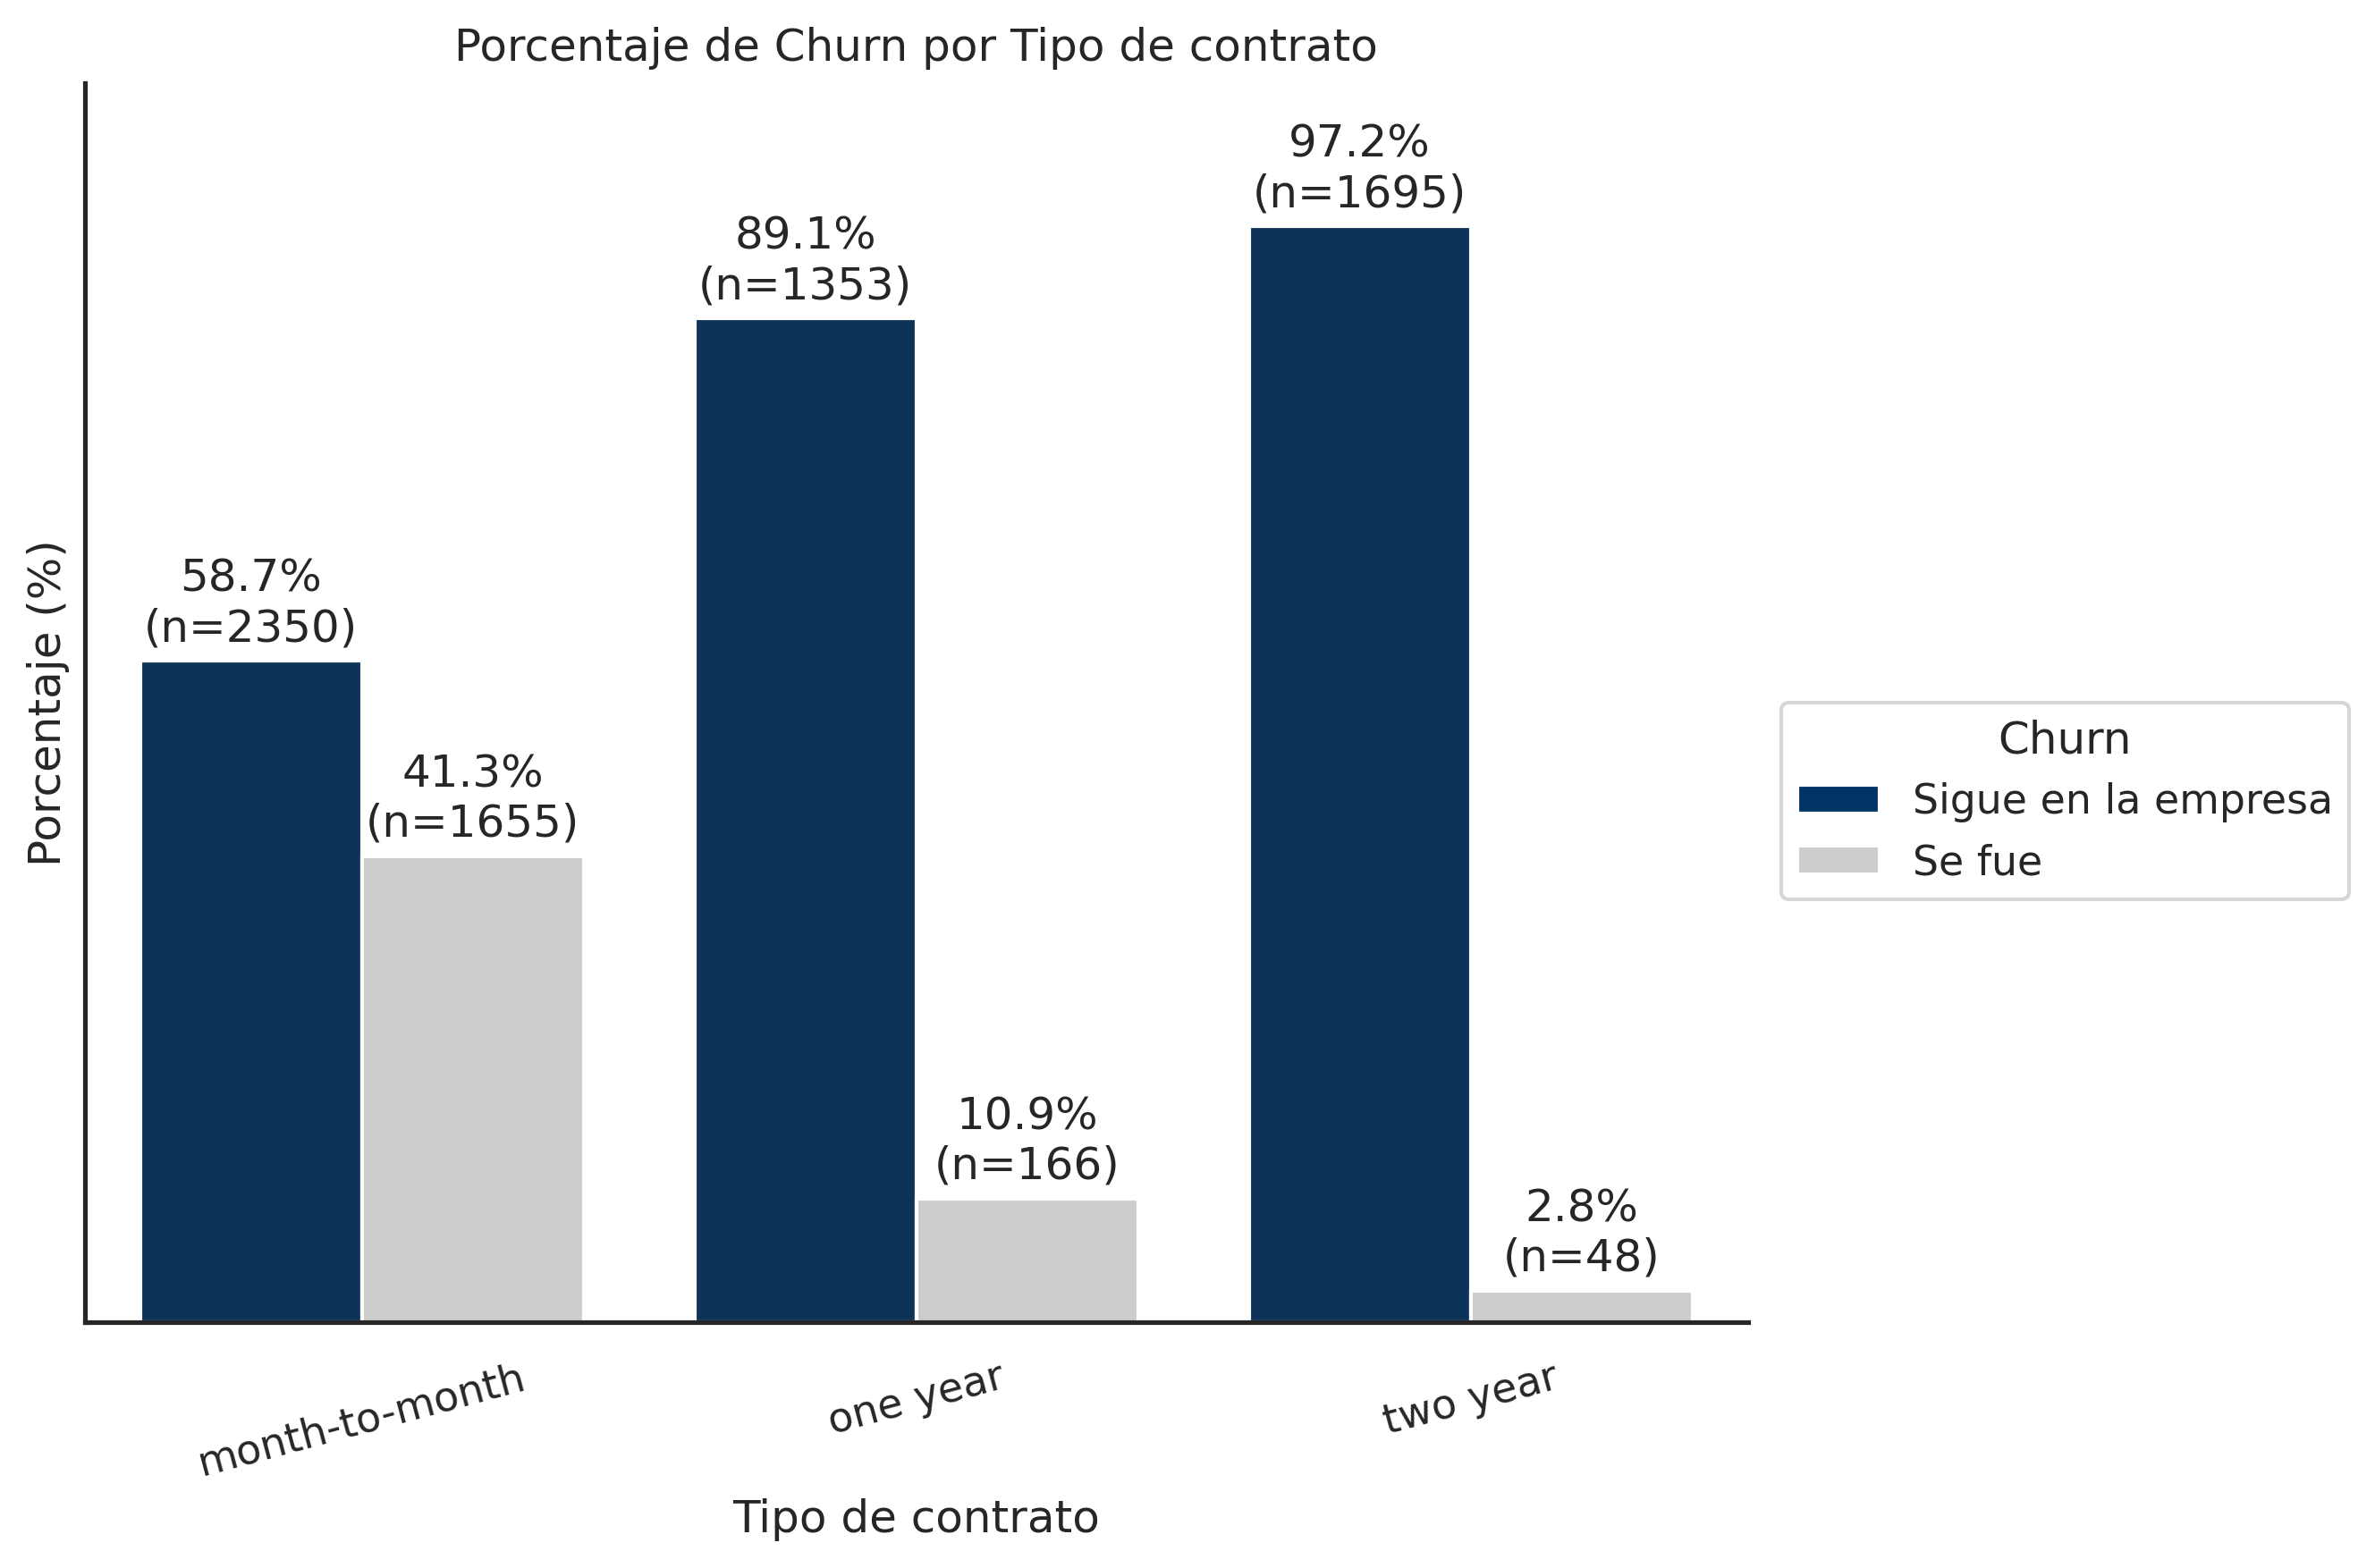

A partir de los datos, llama la atención de como la mayor cantidad de clientes que evaden la compañía son clientes que tienen un contrato Month-to-Month (Mes a Mes).

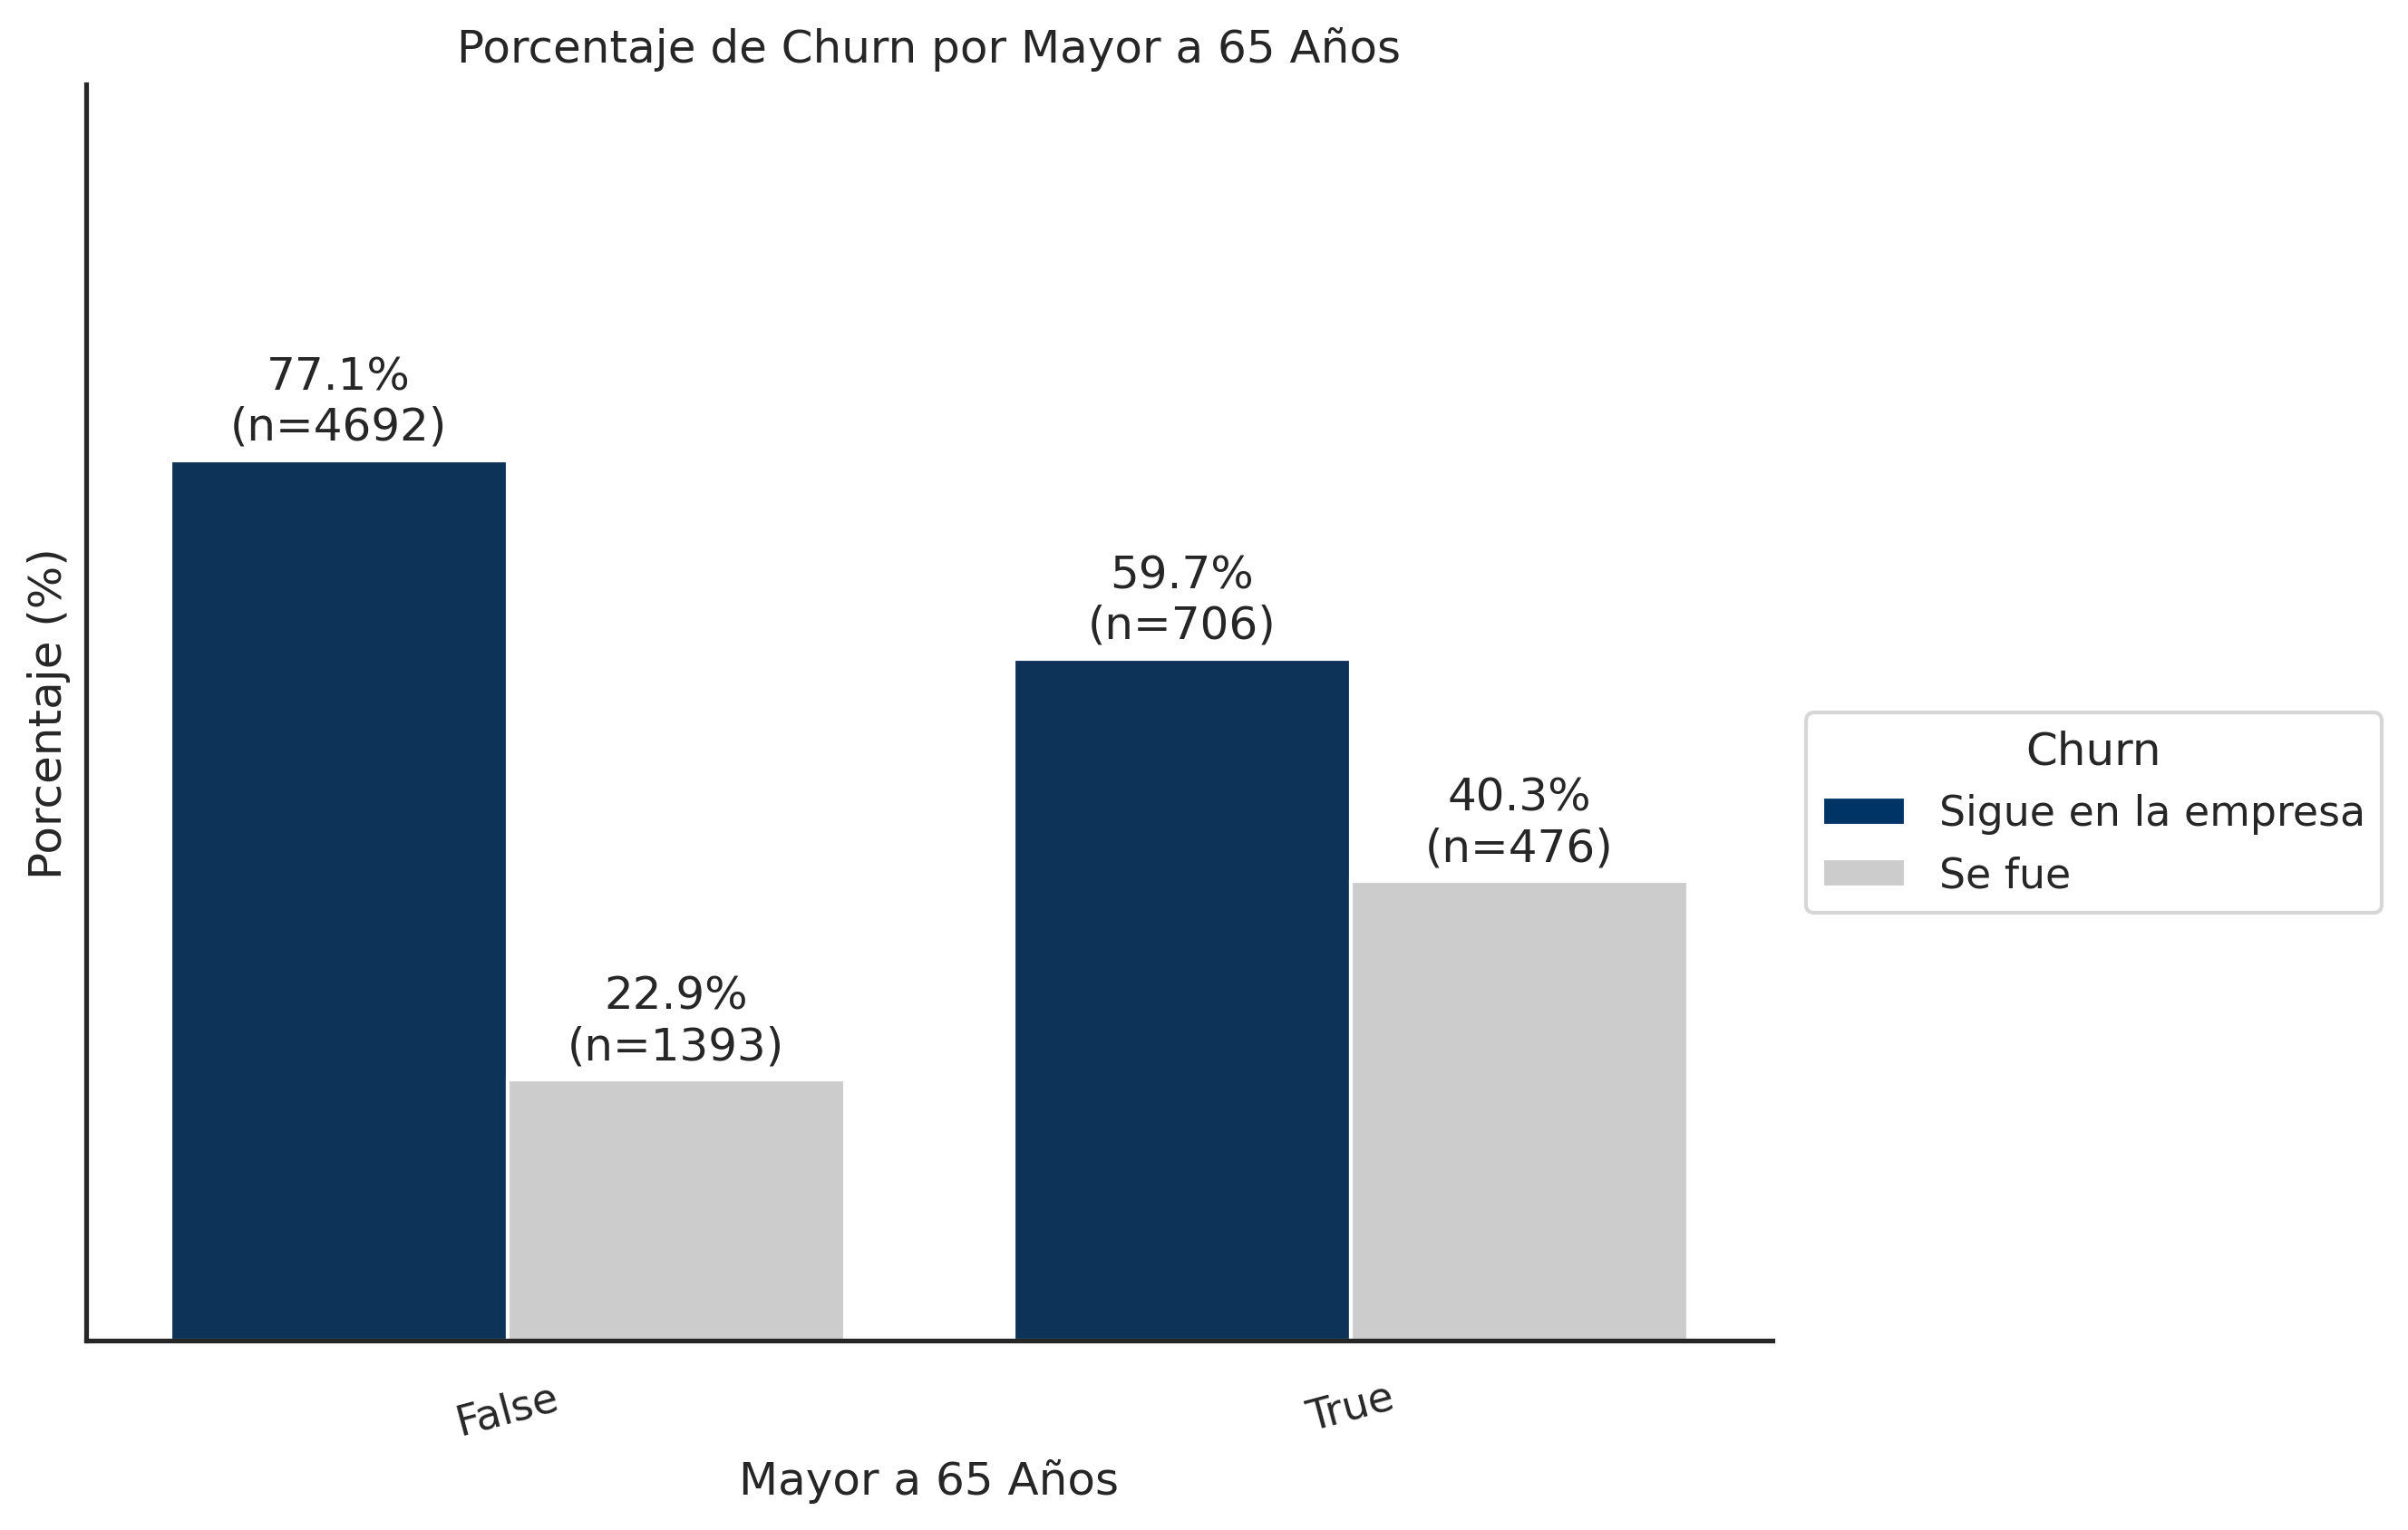

También hay una mayor proporción de clientes mayores de 65 años que dejan la compañia

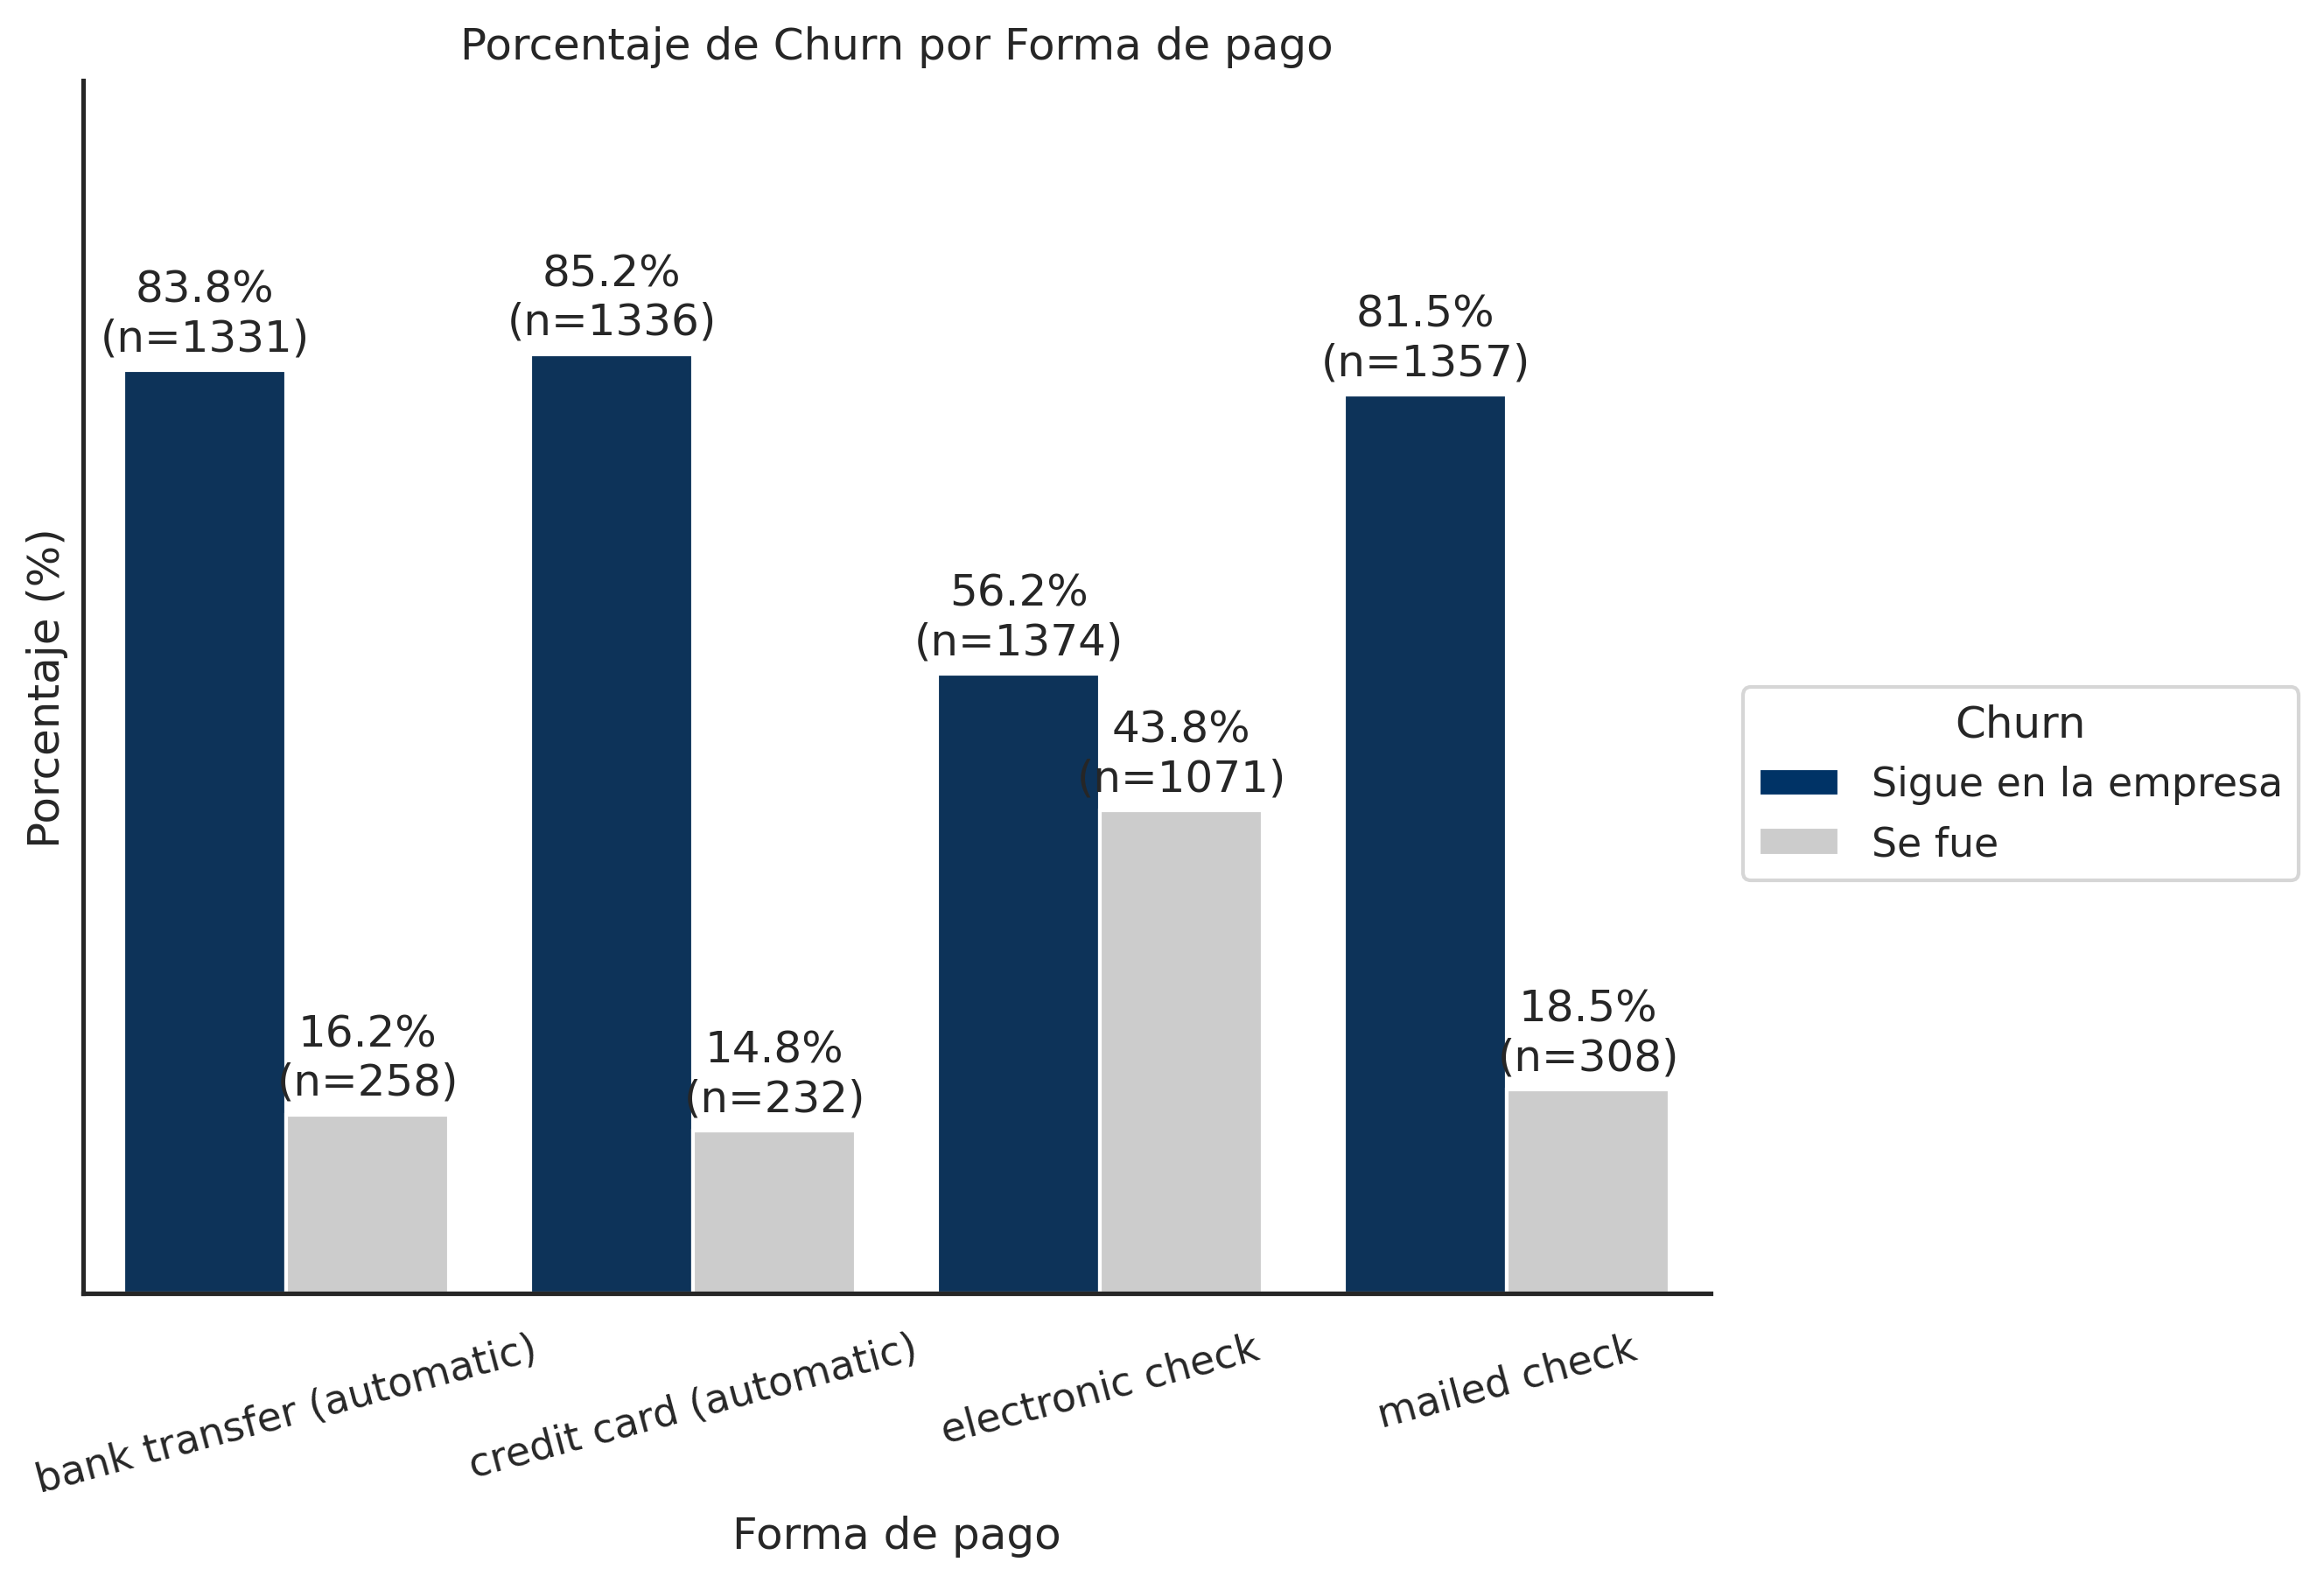

Por último, dentro de todas las variables categóricas la última que llama la atención por la diferencia de evasión dentro de la compañia, son los clientes que hacen el pago mediante medios electrónicos no automatizados.

### Variables númericas

Luego se realizó el análisis de las varaibles númericas, incluso la columna creada por el equipo de ciencia de datos, que indica el valor diario por cada cliente.

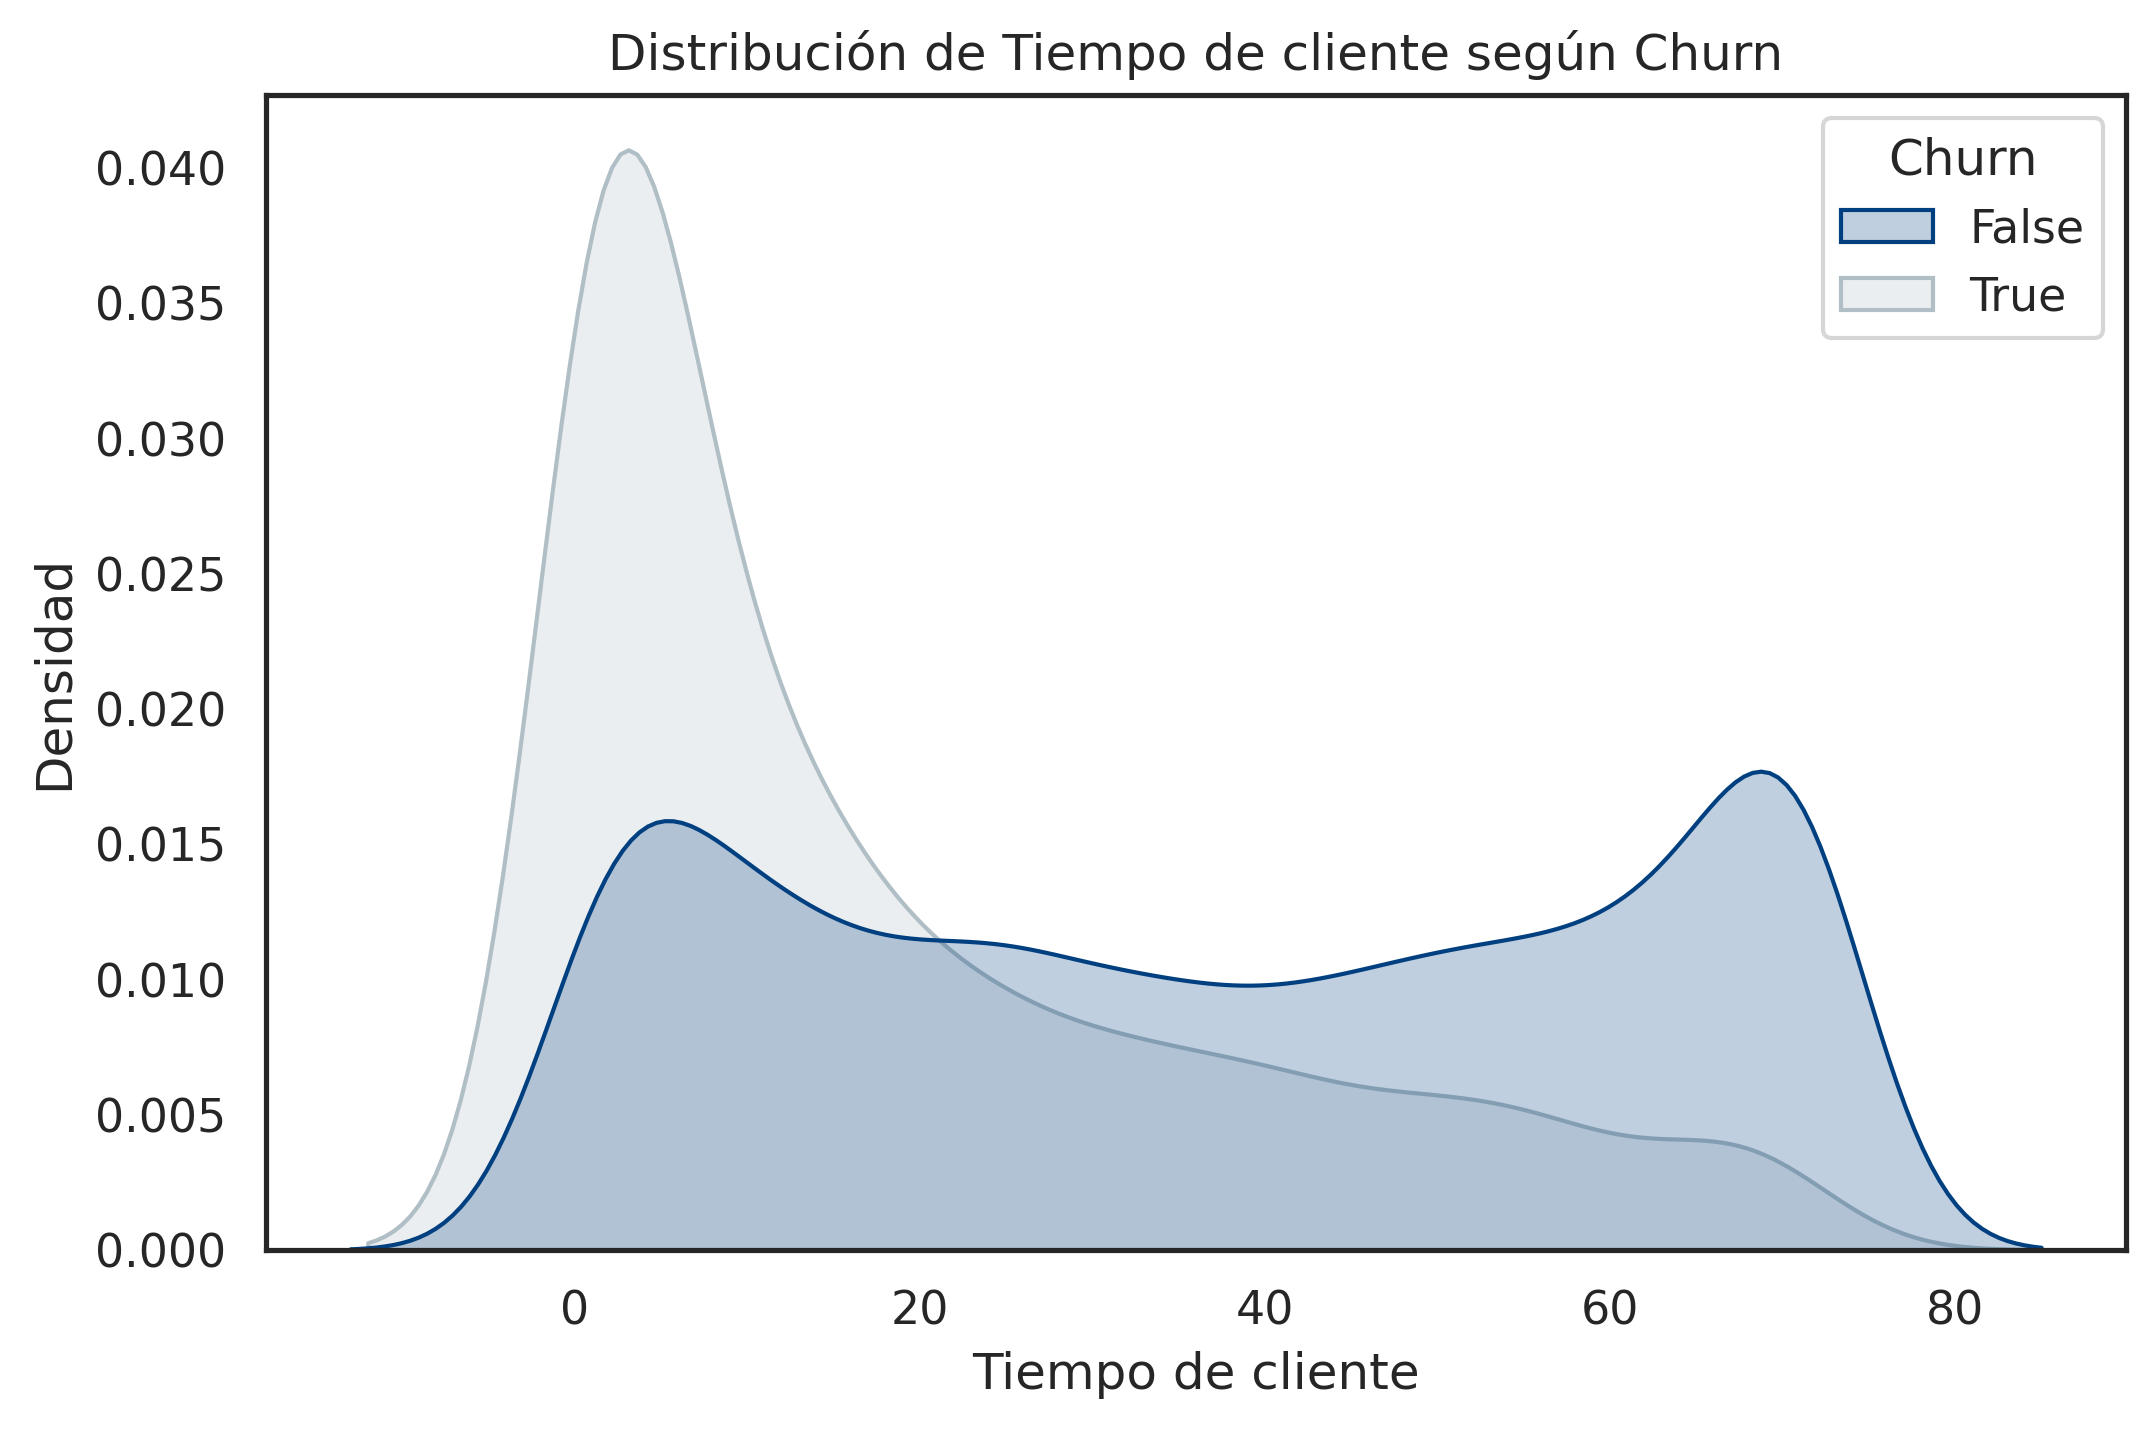

La cantidad de clientes que dejan la empresa suele ser mayor cuando llevan menos tiempo en la compañia.

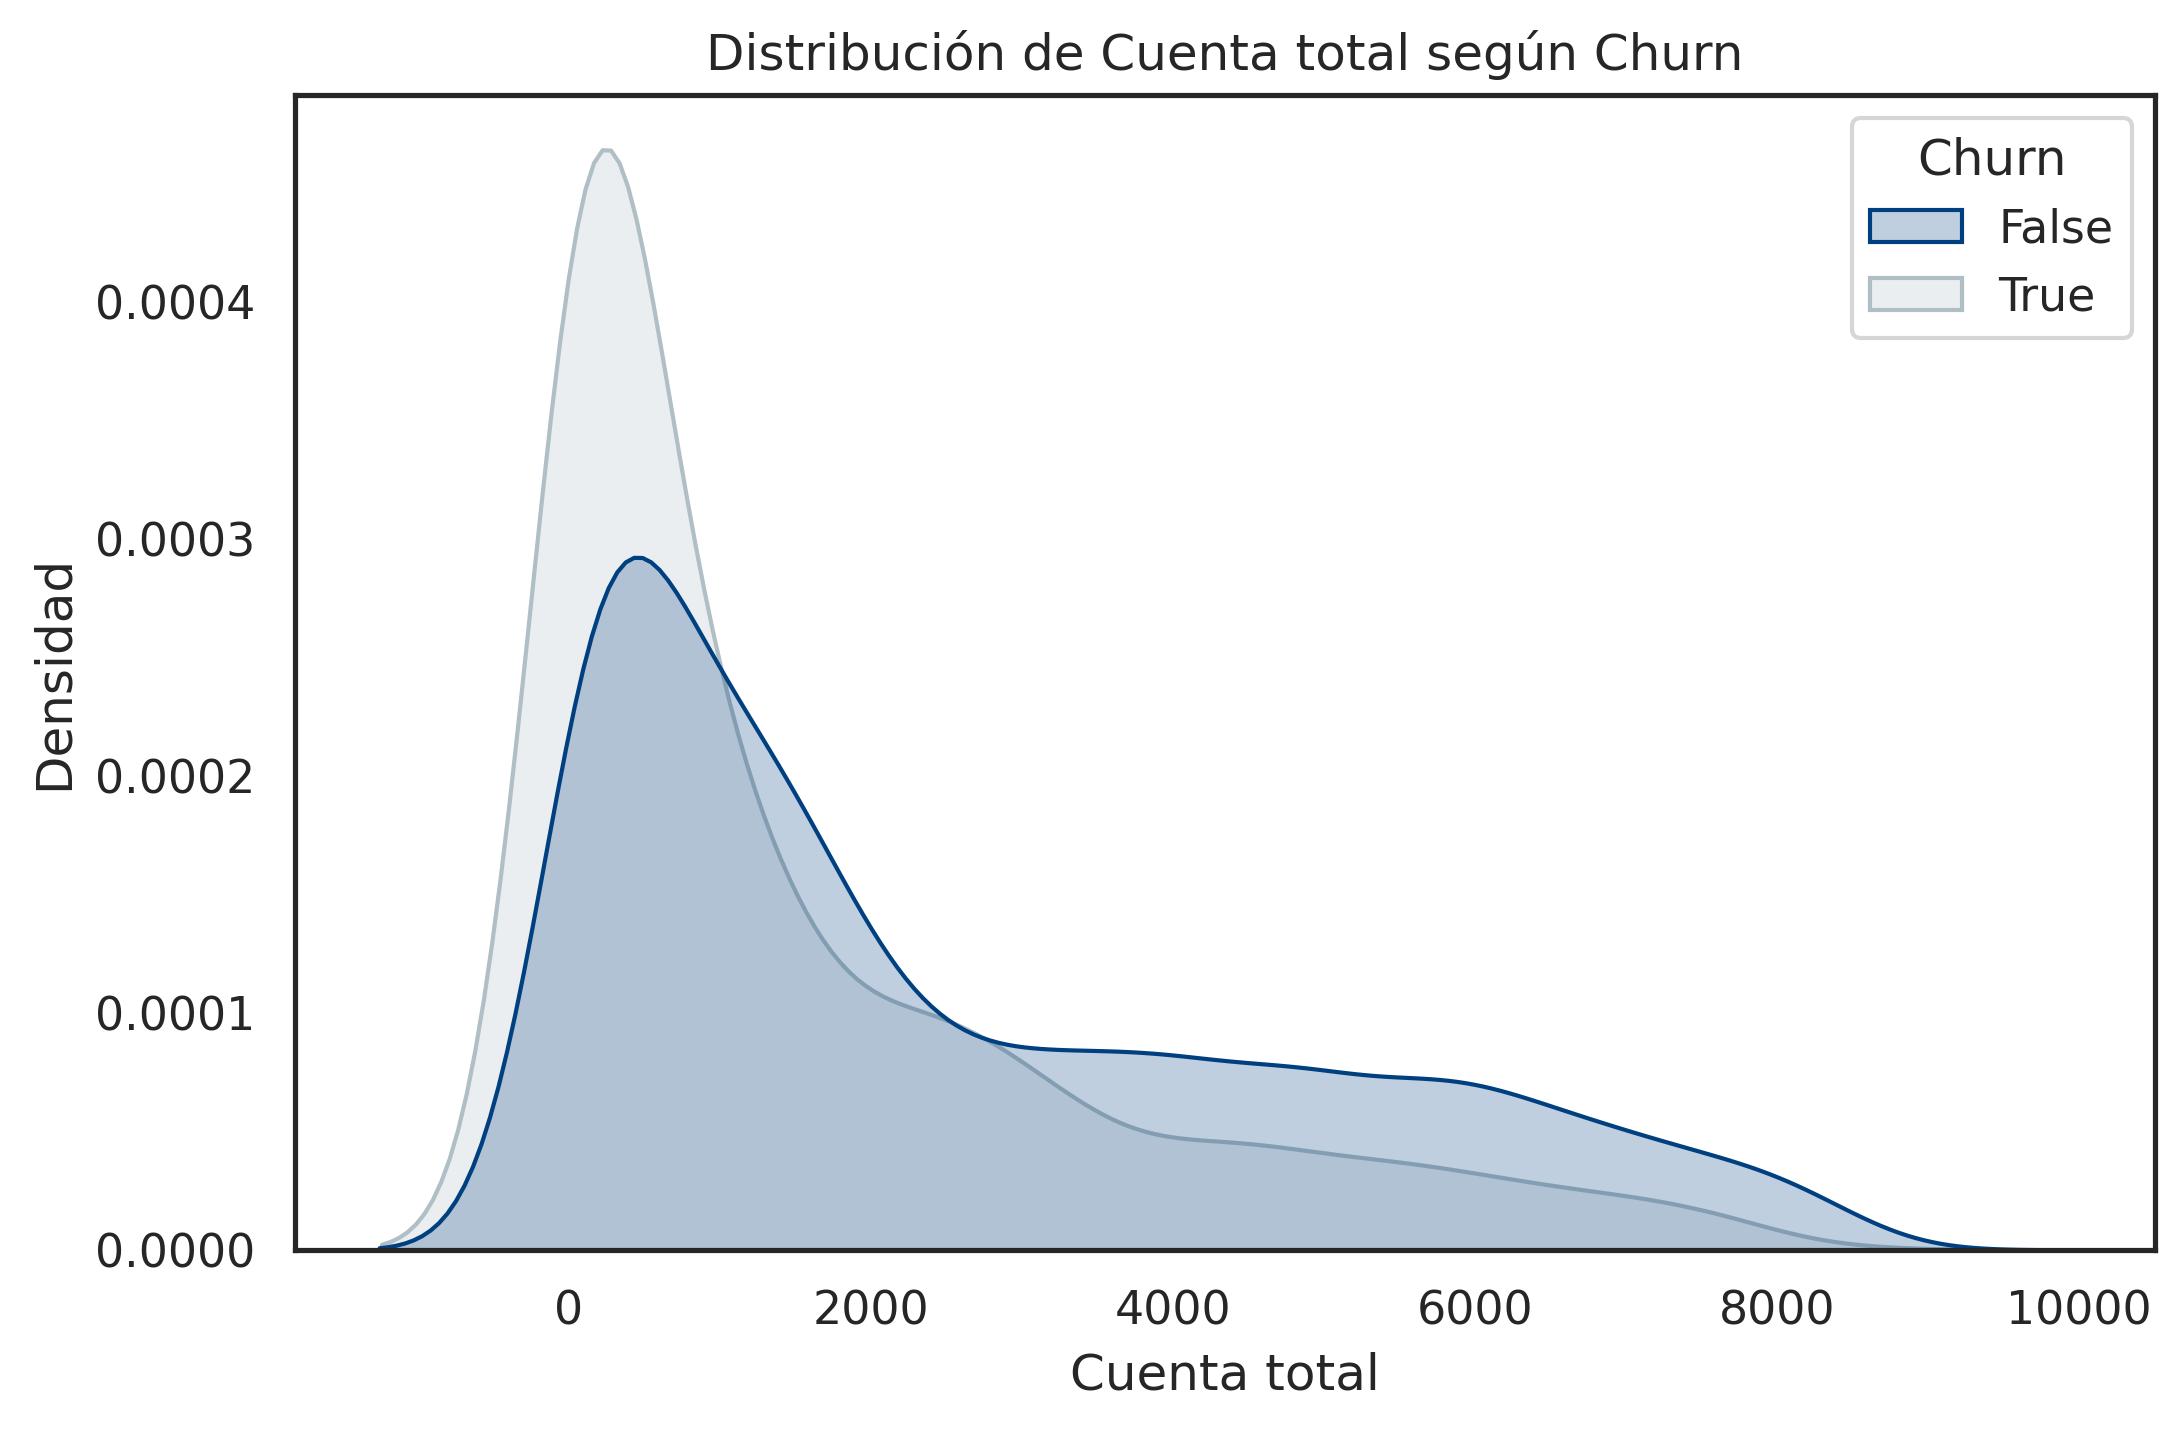

También llama la atención que los clientes que han gastado menos dinero en la empresa en todo el tiempo como clientes, estan más dispuestos a irse.

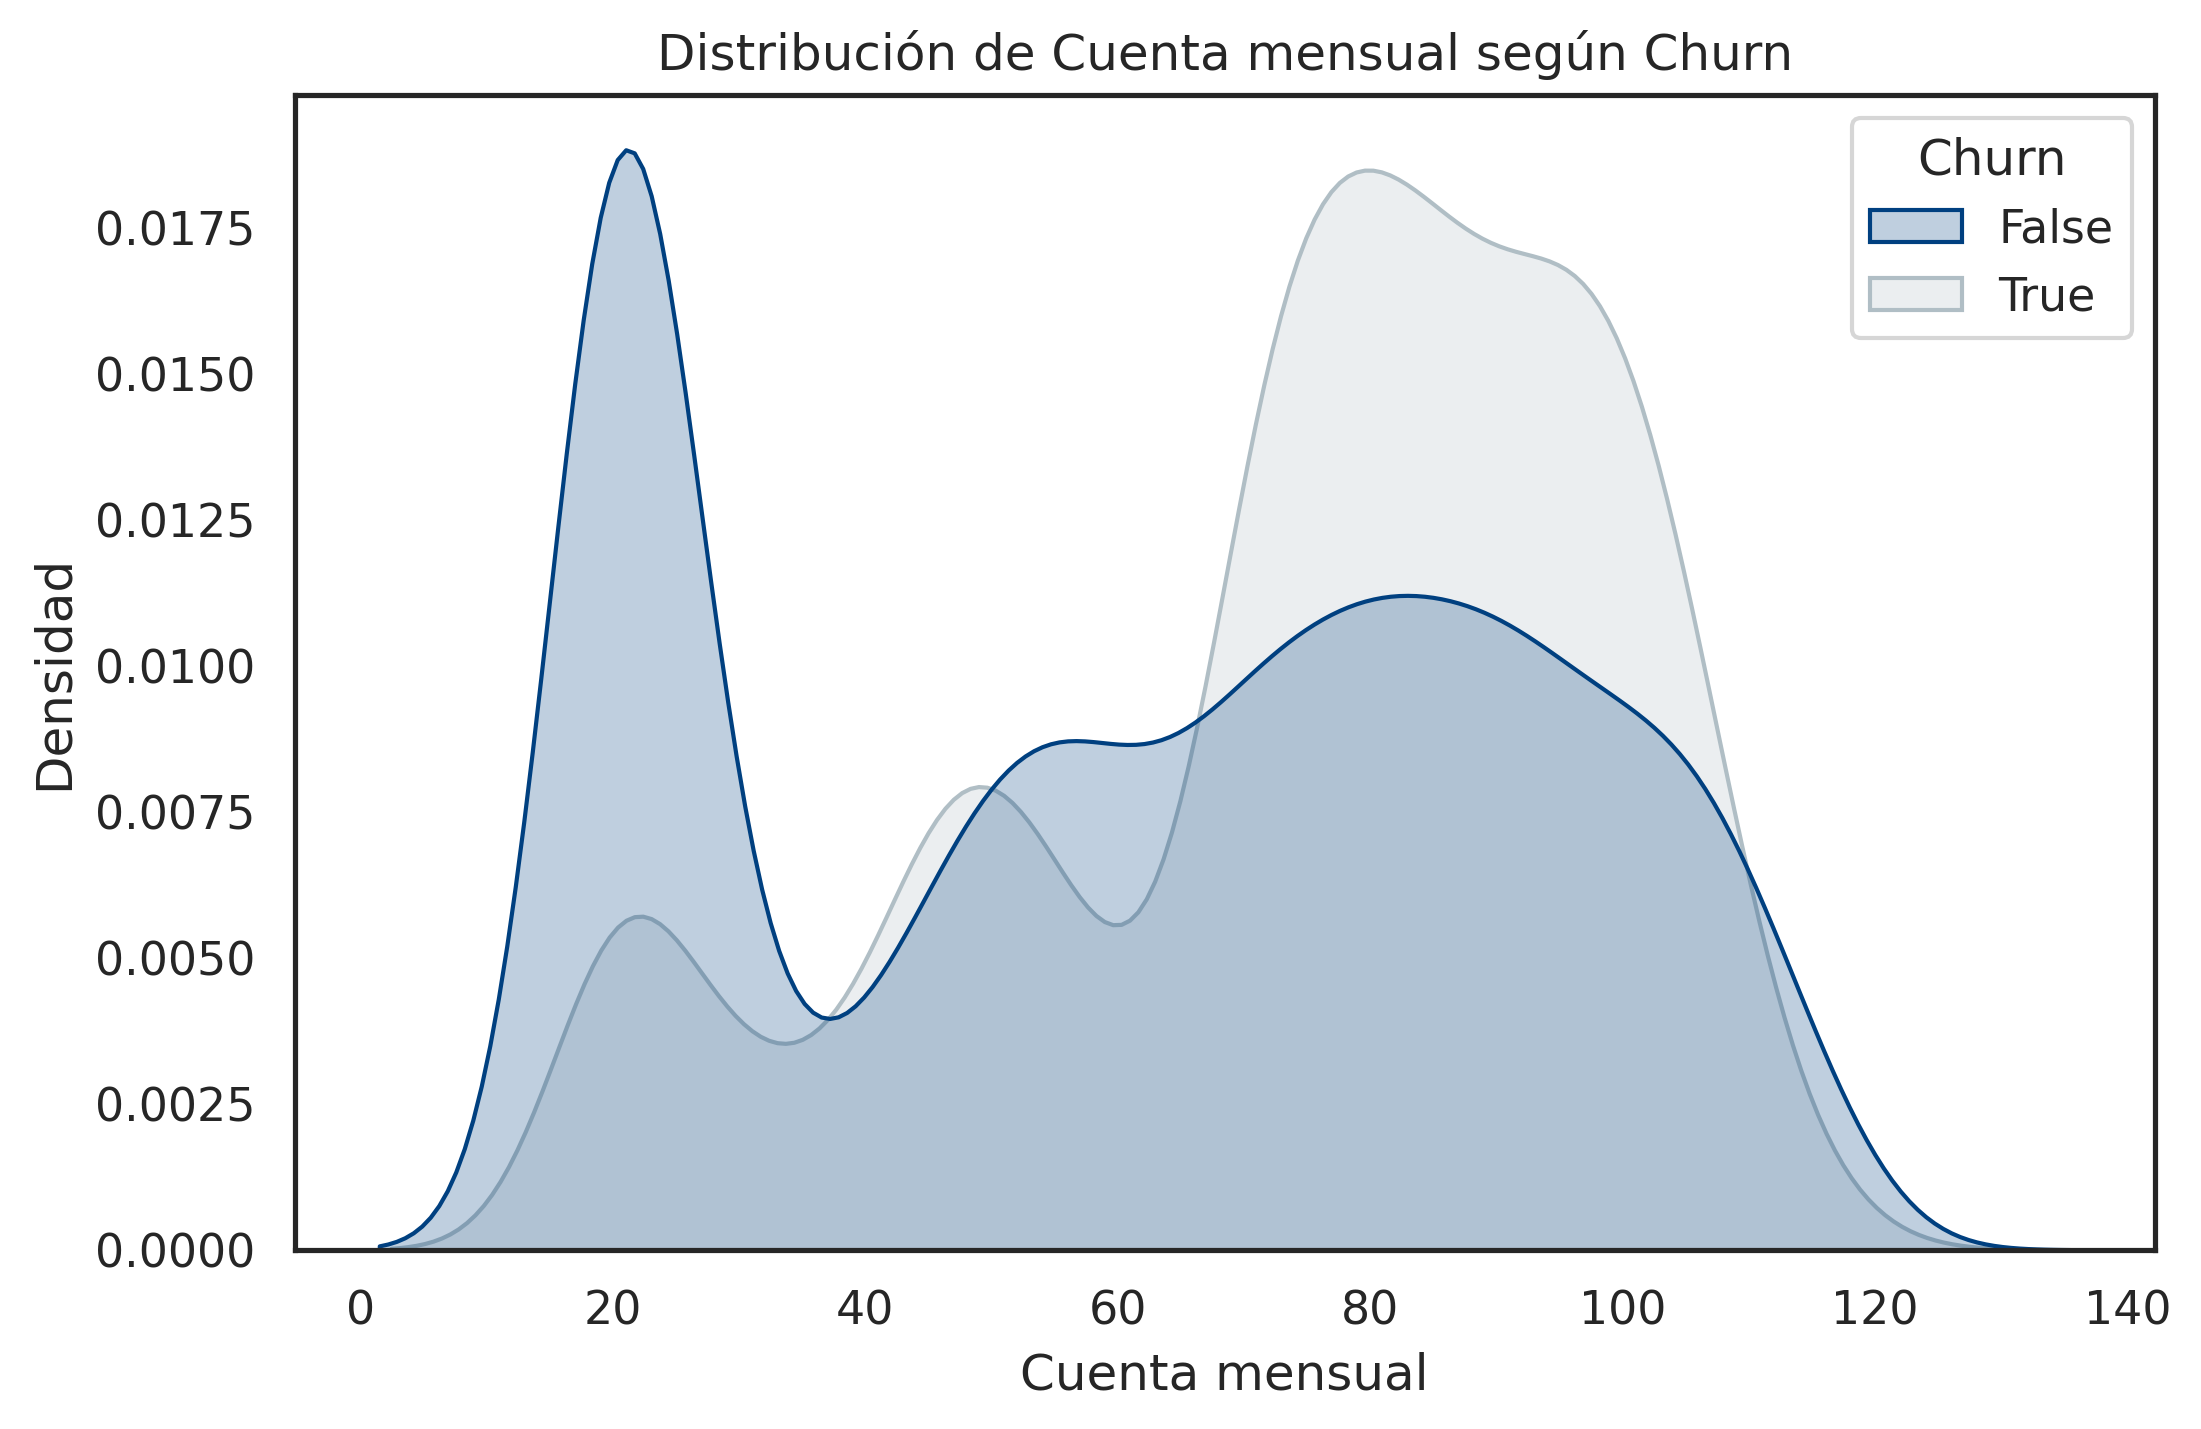

Acá se puede ver un patrón en el que los clientes con un valor de cuenta mensual entre 60 y 110 estan más dispuestos a dejar la empresa.

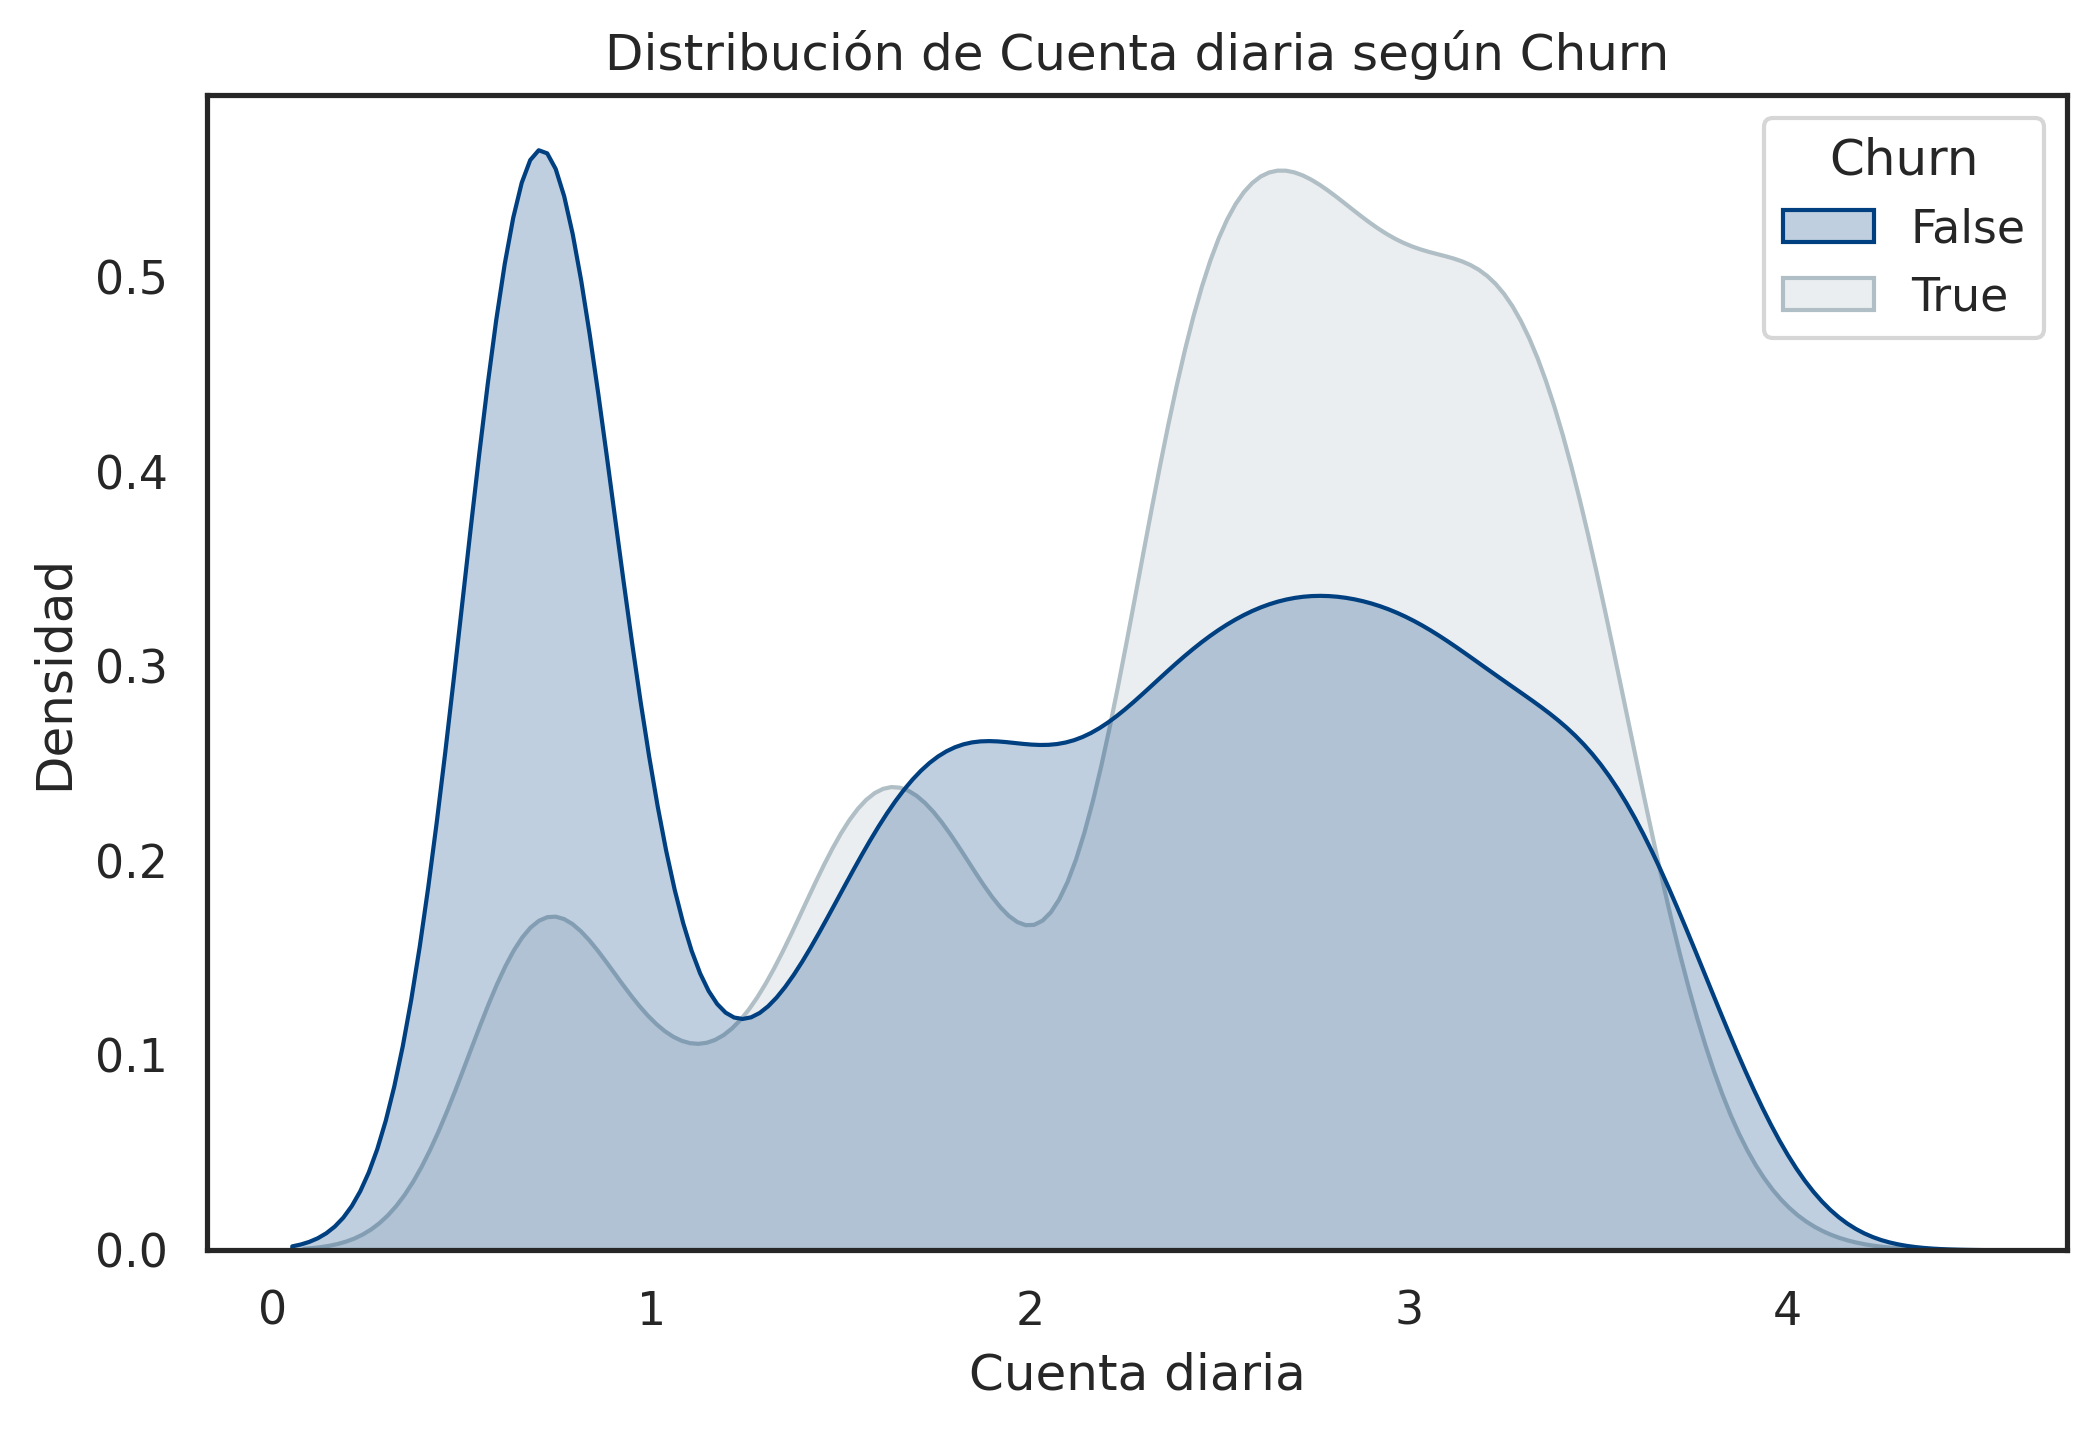

Y por último, los clientes que gastan entre 2 y 4 al día están dejando la empresa en mayor medida.

## Insights y Recomendaciones

1. Los clientes que tienen un contrato de renovación mensual tienden a estar más dispuestos a dejar la empresa, por lo tanto la recomendación que se entrega al área estrategica encargada es reforzar los beneficios a los clientes de renovación mensual para mejorar el porcentaje de retención de los clientes, o hacer una estrategia que haga que los clientes cambien el tipo de contrato de renovación mensual a un contrato a más largo plazo

2. Los clientes mayores a 65 años tienden a dejar la empresa, por lo tanto la recomendación es ayudar a los clientes de esas edades a mantener una buena relación con la tecnología gracias a la empresa, de esta manera se puede garantizar su retención.

3. Los clientes que hacen el pago mediante medios electronicos no automatizados porcentualmente dejan la empresa en mayor medida que con otros medios de pagos automatizados, por lo tanto se recomienda realizar campañas para lograr que los clientes cambien el medio de pago a uno automatizado.

4. Los clientes que llevan poco tiempo y por lo tanto han gastado poco dinero en la empresa están dejando la empresa en mayor medida que aquellos que ya llevan un mayor tiempo. Por lo tanto se recomienda que la empresa haga campañas de fidelización a través de beneficios o regalos a los nuevos clientes.

5. Los clientes que tienen una cuenta mensual de aproximadamente 90, tienen mayor porcentaje de evasión en la empresa, por lo que la recomendación para disminuir este porcentaje es hacer camapañas de descuentos o hacer una disminución del valor de los planes, para tratar de llevar a los clientes al rango de 60 mensuales, el cual es un valor que tiene mayor retención de clientes.